# Dark-Fiber Charakterisierung für entanglement polarisierter QKD

<b><h3>Aufbereitung und Analyse der Messdaten nach Tagesphänomen</h3></b>

Author: Laura Komma  
Dataset: Nordhausen - Sundhausen (<a href="https://zenodo.org/uploads/15183223">29.11.2024_10d.csv</a>)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
import io
import datetime
from scipy.stats import norm

In [2]:
filename ='29.11.2024_10d.csv'
skip = 8
sep = ";"

In [3]:
columns = ['Time[date hh:mm:ss] ', ' Elapsed Time [hh:mm:ss:ms]', ' Normalized s 1 ', ' Normalized s 2 ', ' Normalized s 3 ', ' S 0 [mW]', ' S 1 [mW]', ' S 2 [mW]', ' S 3 [mW]', ' Azimuth[°] ', ' Ellipticity[°] ', ' DOP[%] ', ' DOCP[%] ', ' DOLP[%] ', ' Power[mW] ', ' Pol Power[mW] ', ' Unpol Power[mW] ', ' Power[dBm] ', ' Pol Power[dBm] ', ' Unpol Power[dBm] ', ' Power-Split-Ratio ', ' Phase Difference[°] ', ' Warning']
for c in range(len(columns)):
    print(c, ': ', columns[c])

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

0 :  Time[date hh:mm:ss] 
1 :   Elapsed Time [hh:mm:ss:ms]
2 :   Normalized s 1 
3 :   Normalized s 2 
4 :   Normalized s 3 
5 :   S 0 [mW]
6 :   S 1 [mW]
7 :   S 2 [mW]
8 :   S 3 [mW]
9 :   Azimuth[°] 
10 :   Ellipticity[°] 
11 :   DOP[%] 
12 :   DOCP[%] 
13 :   DOLP[%] 
14 :   Power[mW] 
15 :   Pol Power[mW] 
16 :   Unpol Power[mW] 
17 :   Power[dBm] 
18 :   Pol Power[dBm] 
19 :   Unpol Power[dBm] 
20 :   Power-Split-Ratio 
21 :   Phase Difference[°] 
22 :   Warning


## Degree of Polarisation (DOP [%])

In [4]:
degree = pd.read_csv(filename,skiprows=skip, sep=sep, usecols=[columns[0], columns[11]])

In [5]:
degree[columns[0]] = pd.to_datetime(degree[columns[0]])
degree.set_index(columns[0], inplace=True)

### Aufteilung nach Tagen

In [6]:
degree_daily = degree.groupby(degree.index.date)
degree_daily_list = list(degree_daily)

In [7]:
for date, df_day in degree_daily_list:
    print(date, '\n')
    print(df_day.describe())
    print('')

2024-11-29 

            DOP[%] 
count  1.676194e+06
mean   9.956919e+01
std    7.112112e+00
min   -3.703300e+03
25%    9.688000e+01
50%    9.967000e+01
75%    1.024400e+02
max    2.895590e+03

2024-11-30 

            DOP[%] 
count  1.500099e+06
mean   9.981857e+01
std    3.211169e+00
min    8.088000e+01
25%    9.752000e+01
50%    9.969000e+01
75%    1.022700e+02
max    1.242400e+02

2024-12-01 

            DOP[%] 
count  1.429572e+06
mean   9.977245e+01
std    3.271031e+00
min    7.374000e+01
25%    9.734000e+01
50%    9.938000e+01
75%    1.022900e+02
max    1.350300e+02

2024-12-02 

            DOP[%] 
count  1.368538e+06
mean   1.001463e+02
std    3.223490e+00
min    8.404000e+01
25%    9.781000e+01
50%    9.985000e+01
75%    1.025800e+02
max    1.164700e+02

2024-12-03 

            DOP[%] 
count  1.117895e+06
mean   9.903248e+01
std    4.732648e+00
min   -4.618900e+02
25%    9.733000e+01
50%    9.897000e+01
75%    1.007900e+02
max    2.062070e+03



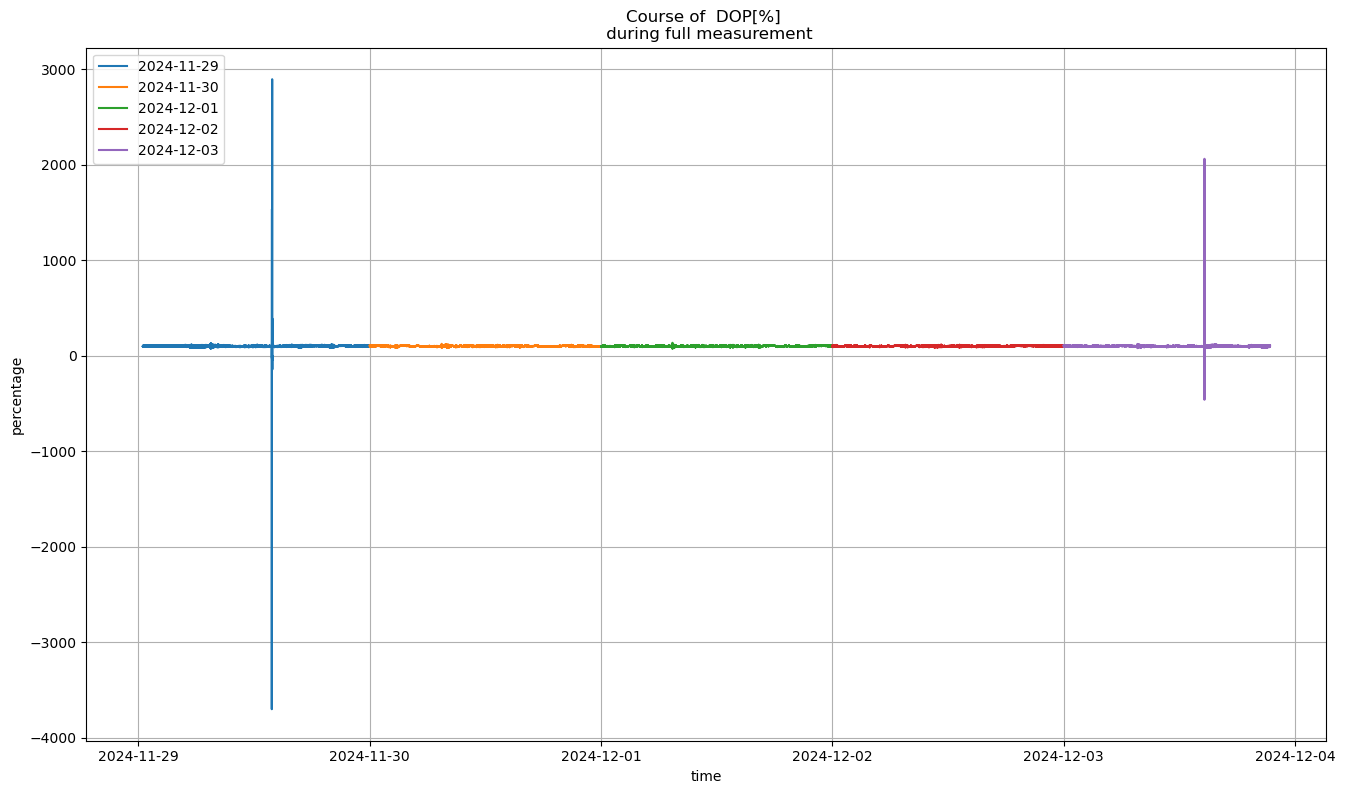

In [8]:
plt.figure(figsize = (16,9))
for date, df_day in degree_daily_list:
    values = df_day
    plt.plot(values, label=str(date))
plt.grid()
plt.legend(loc = 'best')
plt.title(f'Course of {columns[11]}\n during full measurement')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

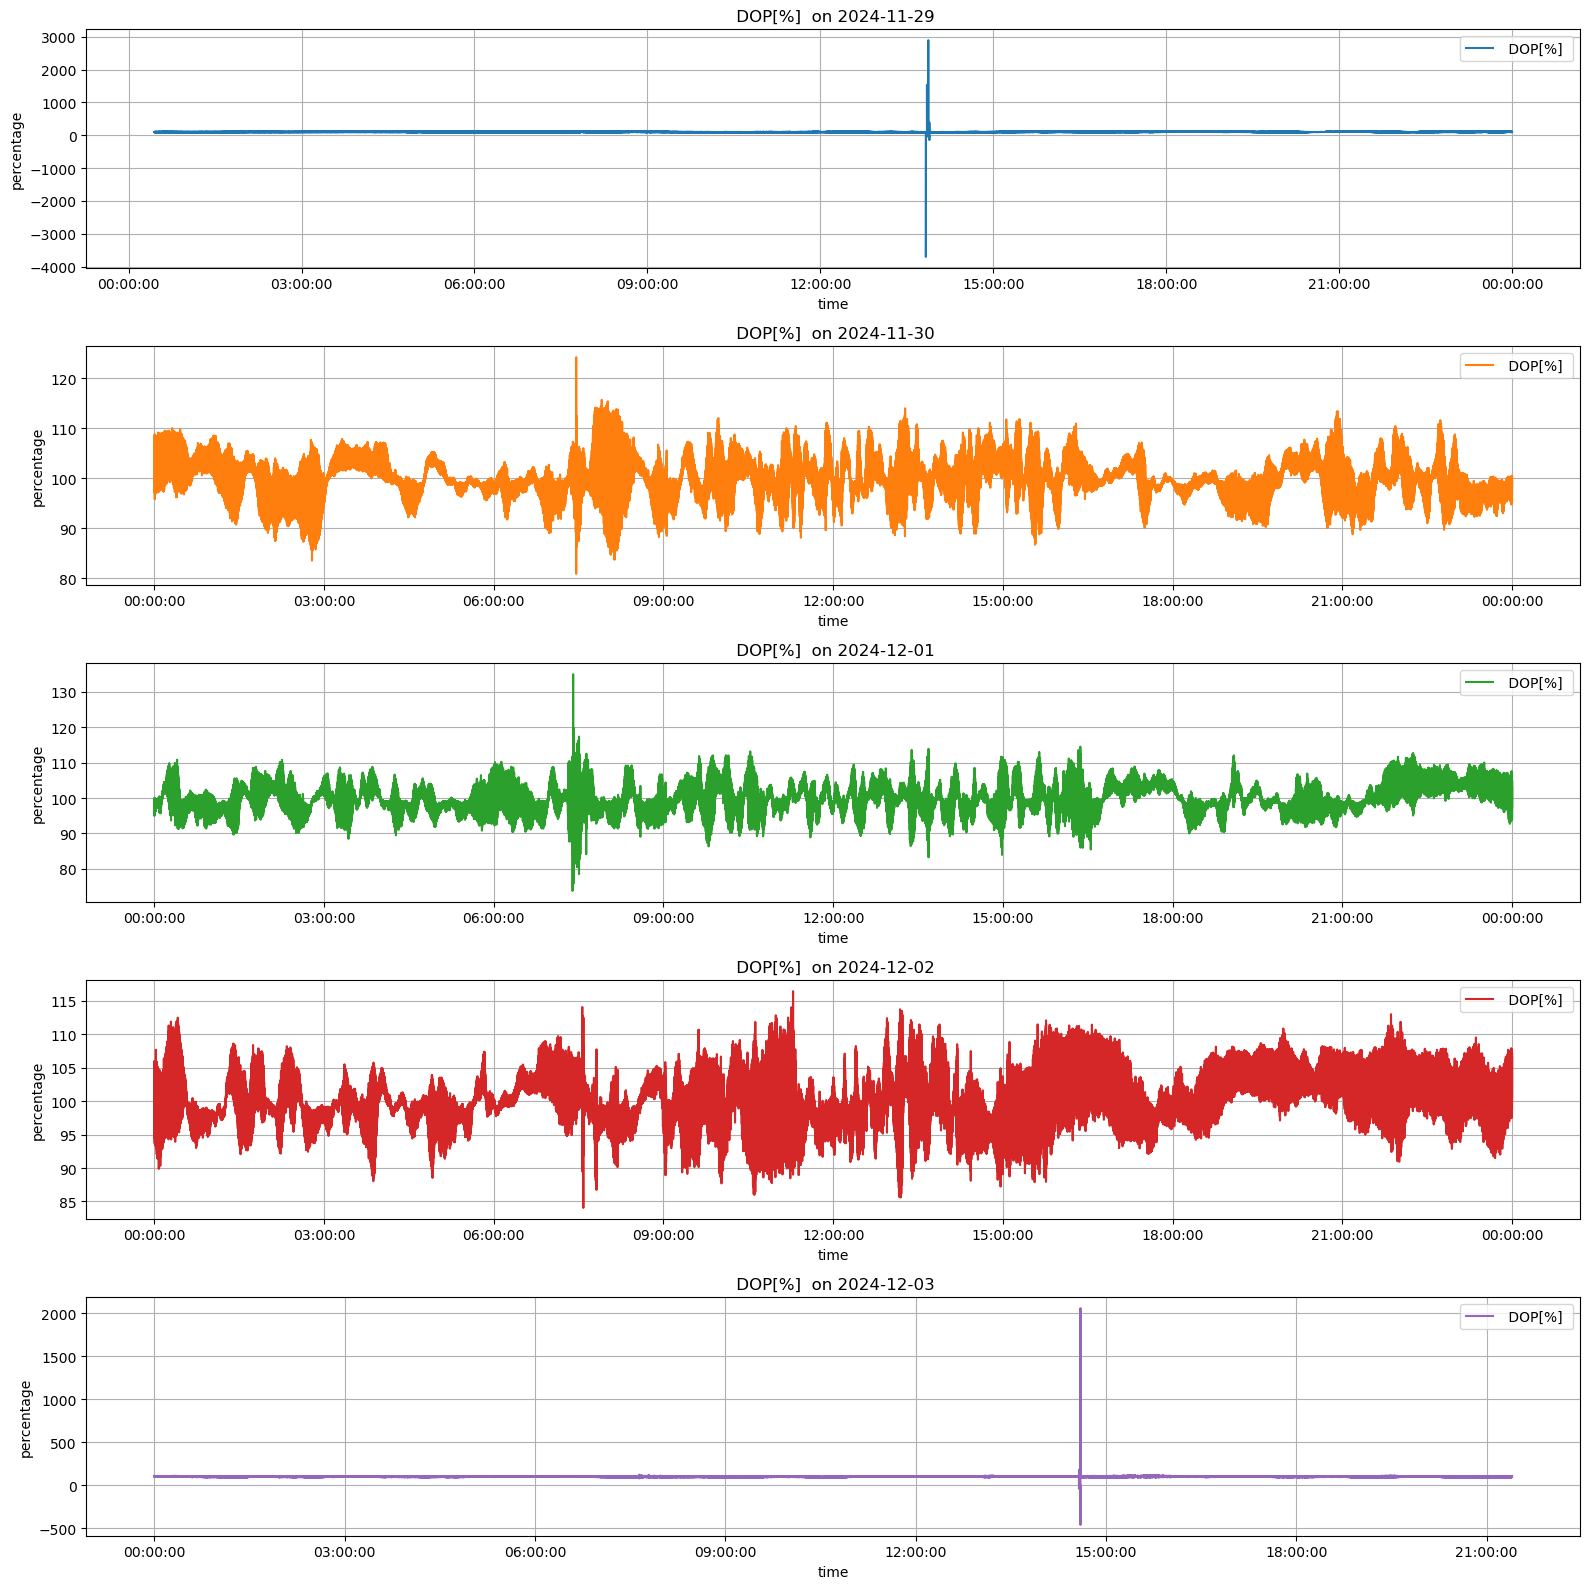

In [9]:
fig, axs = plt.subplots(len(degree_daily_list), 1, figsize=(16, 16), sharex=False)

for i in range(len(degree_daily_list)):
    ax = axs[i] if len(degree_daily_list) > 1 else axs
    df_day = degree_daily_list[i][1]

    ax.plot(df_day.index, df_day, label=columns[11], color=colors[i])
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'{columns[11]} on {degree_daily_list[i][0]}')
    ax.set_xlabel('time')
    ax.set_ylabel('percentage')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.tight_layout()
plt.show()

In [10]:
def format_time(x, pos):
    h = int(x) // 3600
    m = (int(x) % 3600) // 60
    return f"{h:02d}:{m:02d}"

In [11]:
'''fig, ax = plt.subplots(figsize = (16,9))

for date, df_day in degree_daily_list:
    times = (df_day.index - df_day.index.normalize()).total_seconds()
    values = df_day
    plt.plot(times, values, label=str(date))
    

ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
ax.set_xlim(0, 24 * 3600)

plt.grid()
plt.legend(loc = 'best')
plt.title(f'Daily course of {columns[11]}')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()'''

"fig, ax = plt.subplots(figsize = (16,9))\n\nfor date, df_day in degree_daily_list:\n    times = (df_day.index - df_day.index.normalize()).total_seconds()\n    values = df_day\n    plt.plot(times, values, label=str(date))\n    \n\nax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))\nax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))\nax.set_xlim(0, 24 * 3600)\n\nplt.grid()\nplt.legend(loc = 'best')\nplt.title(f'Daily course of {columns[11]}')\nplt.xlabel('time')\nplt.ylabel('percentage')\nplt.show()"

### Aufteilung in Stunden (Exemplarisch: erster Tag)

In [12]:
# exemplary day
day = 0 #first day

In [13]:
degree_one_day = degree_daily_list[day][1]
hourly = degree_one_day.groupby(degree_one_day.index.hour)
degree_hourly = list(hourly)

In [17]:
for hour, df_hour in degree_hourly:
    print(f'{hour}:00\n')
    print(df_hour.describe())
    print('')

0:00

            DOP[%] 
count  41275.000000
mean      98.782586
std        2.762127
min       92.610000
25%       96.120000
50%       99.190000
75%      101.250000
max      106.270000

1:00

            DOP[%] 
count  74616.000000
mean      98.671192
std        2.760749
min       92.290000
25%       96.050000
50%       98.895000
75%      101.180000
max      106.340000

2:00

            DOP[%] 
count  74706.000000
mean      99.697654
std        2.657860
min       93.690000
25%       97.170000
50%       99.890000
75%      102.180000
max      106.550000

3:00

            DOP[%] 
count  74791.000000
mean     100.668886
std        2.529215
min       94.970000
25%       98.290000
50%      100.970000
75%      102.970000
max      107.430000

4:00

            DOP[%] 
count  74793.000000
mean     101.770583
std        2.758068
min       89.800000
25%       99.520000
50%      101.790000
75%      103.920000
max      113.100000

5:00

            DOP[%] 
count  74747.000000
mean      98.515741

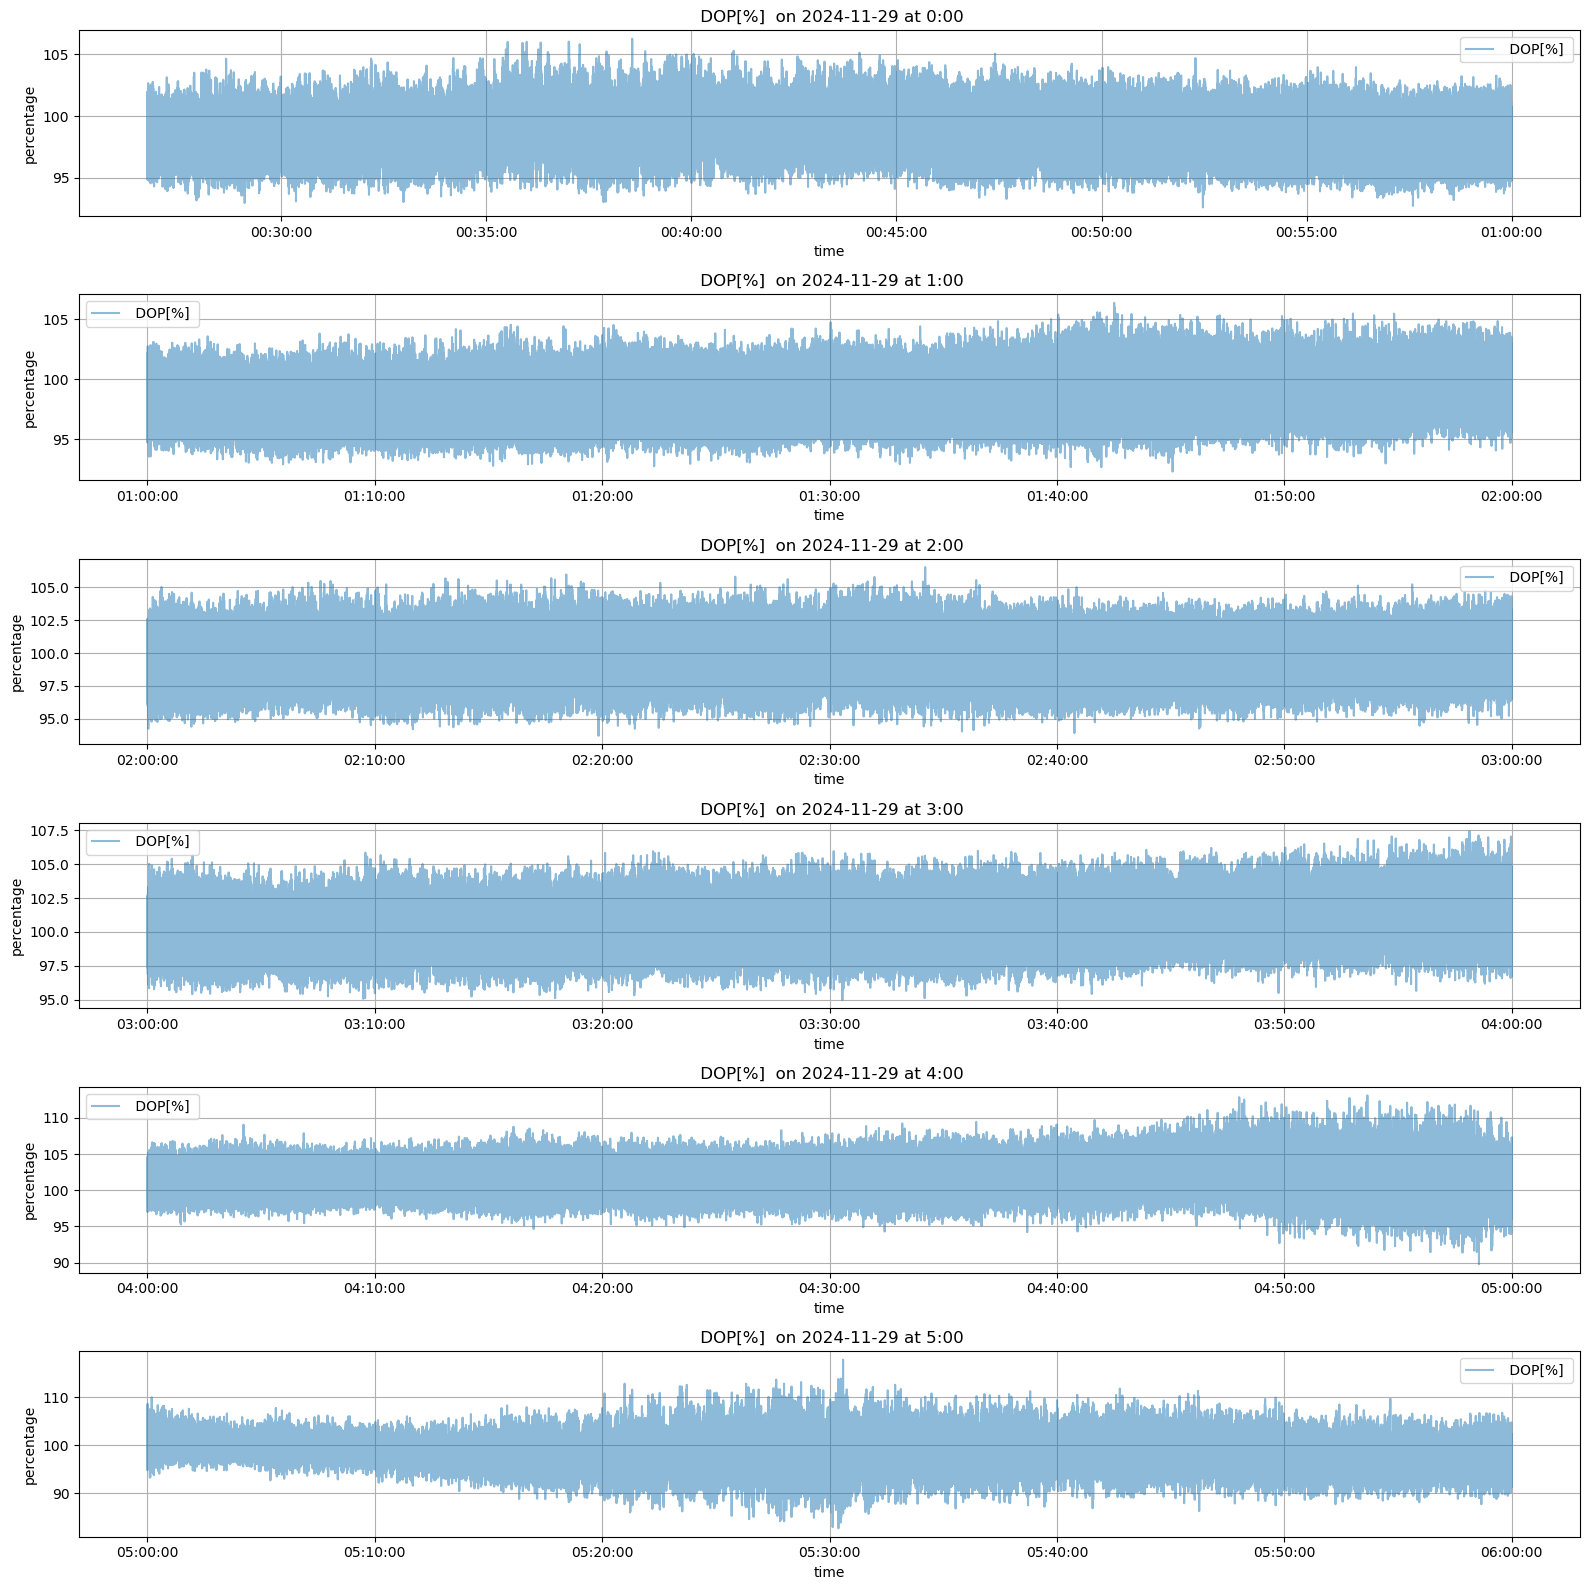

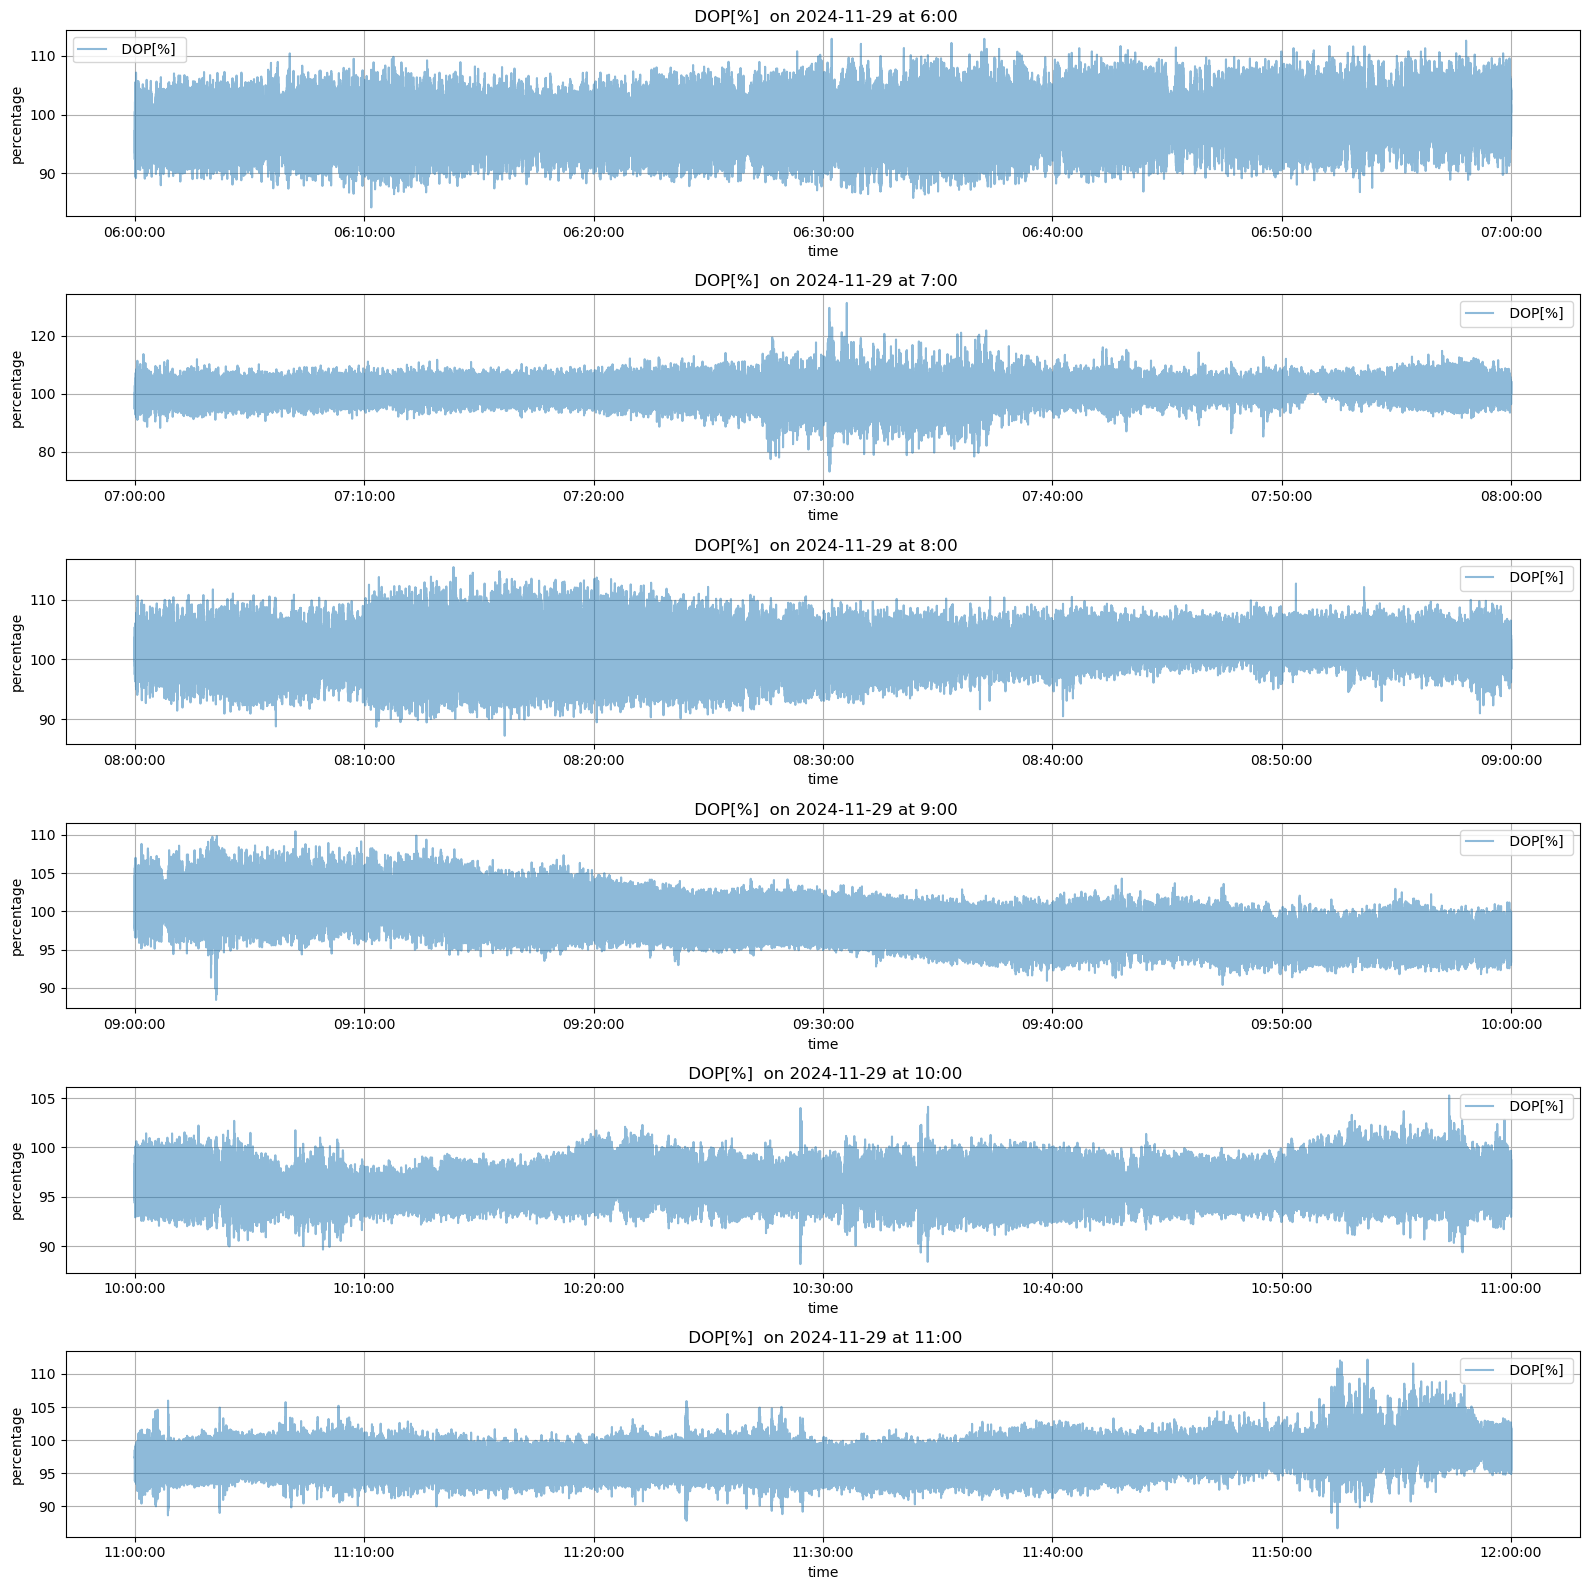

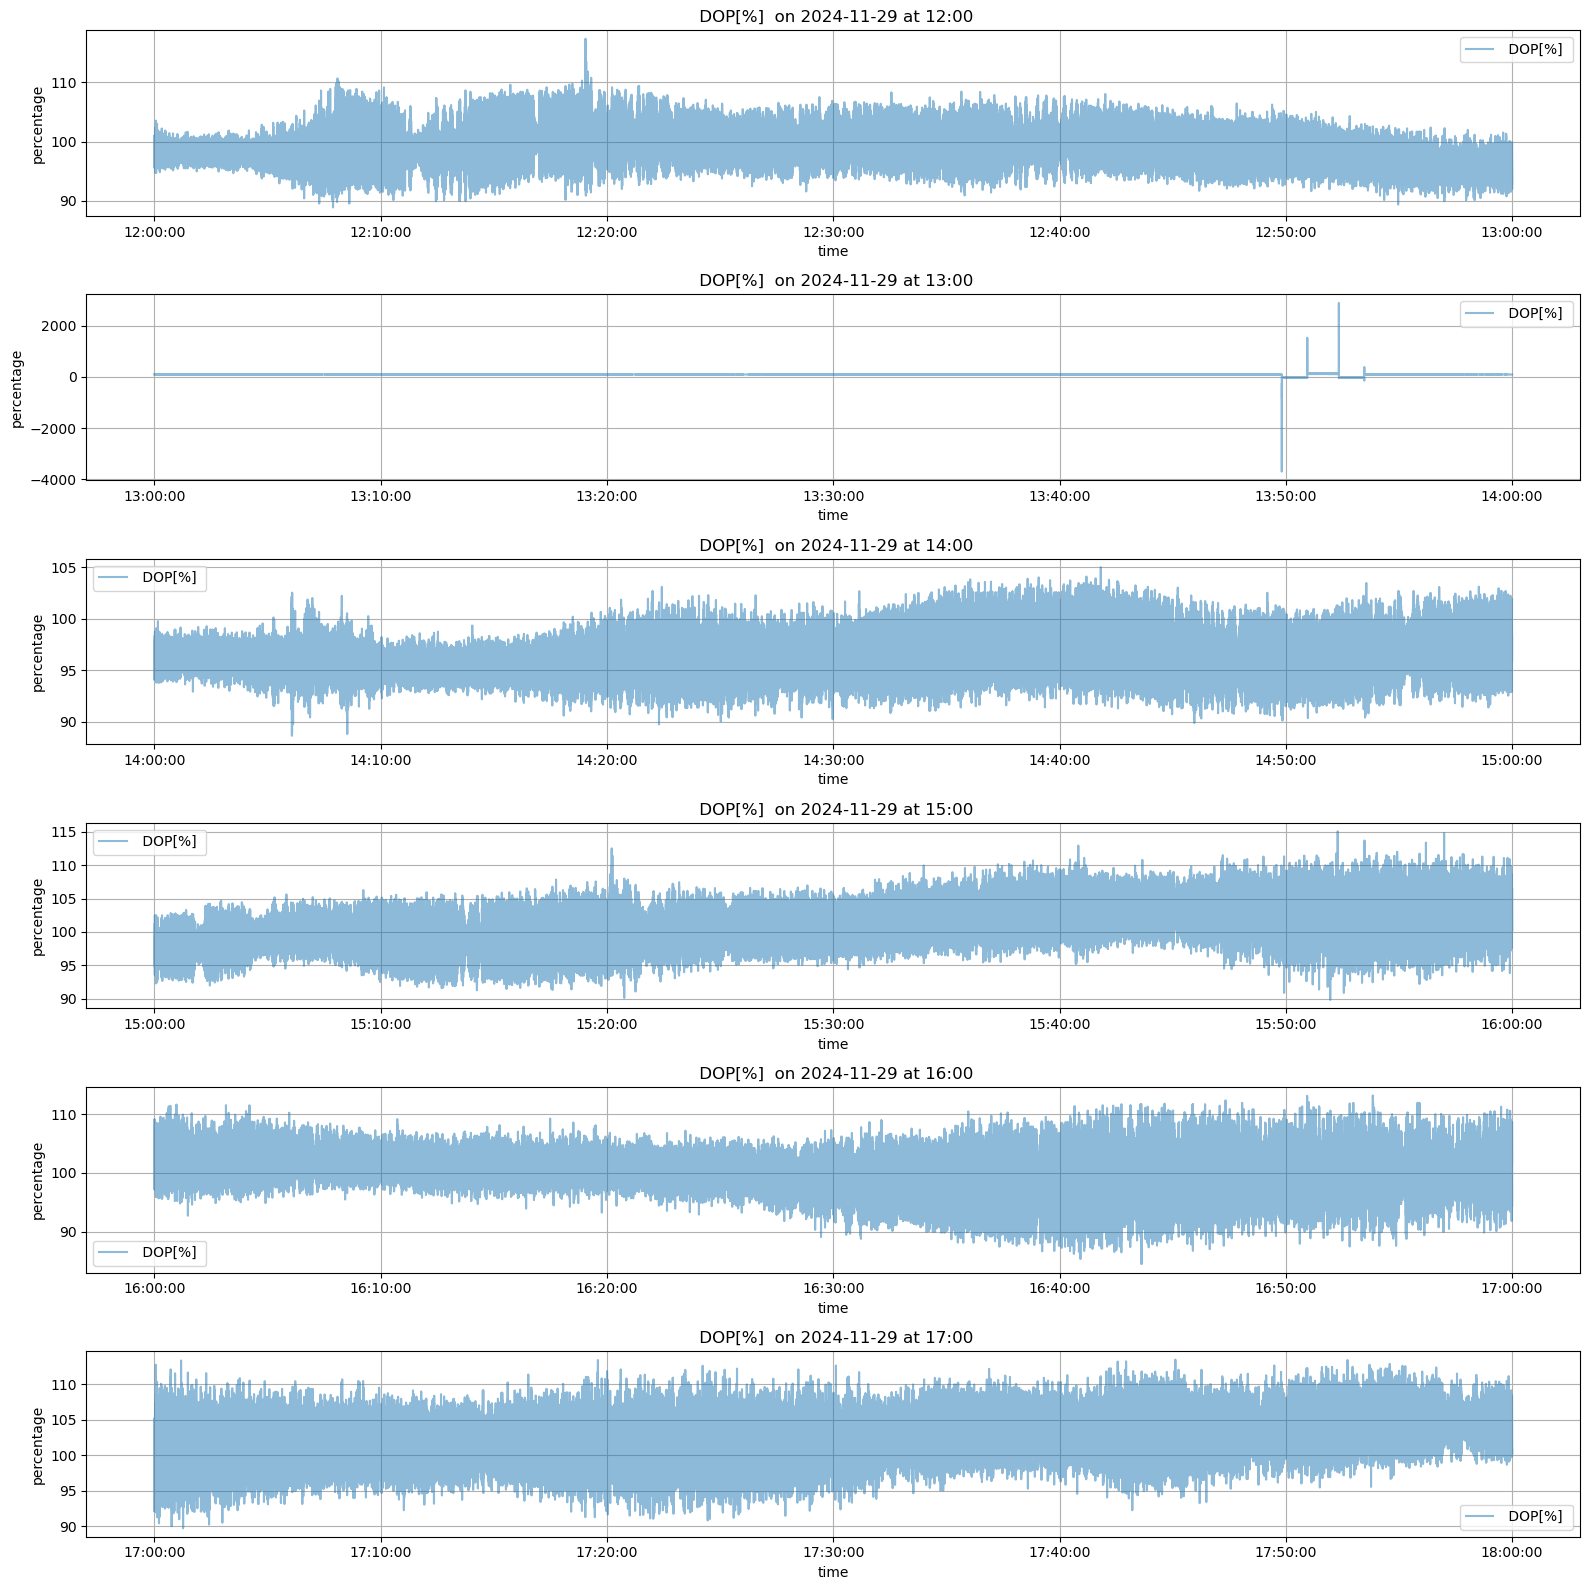

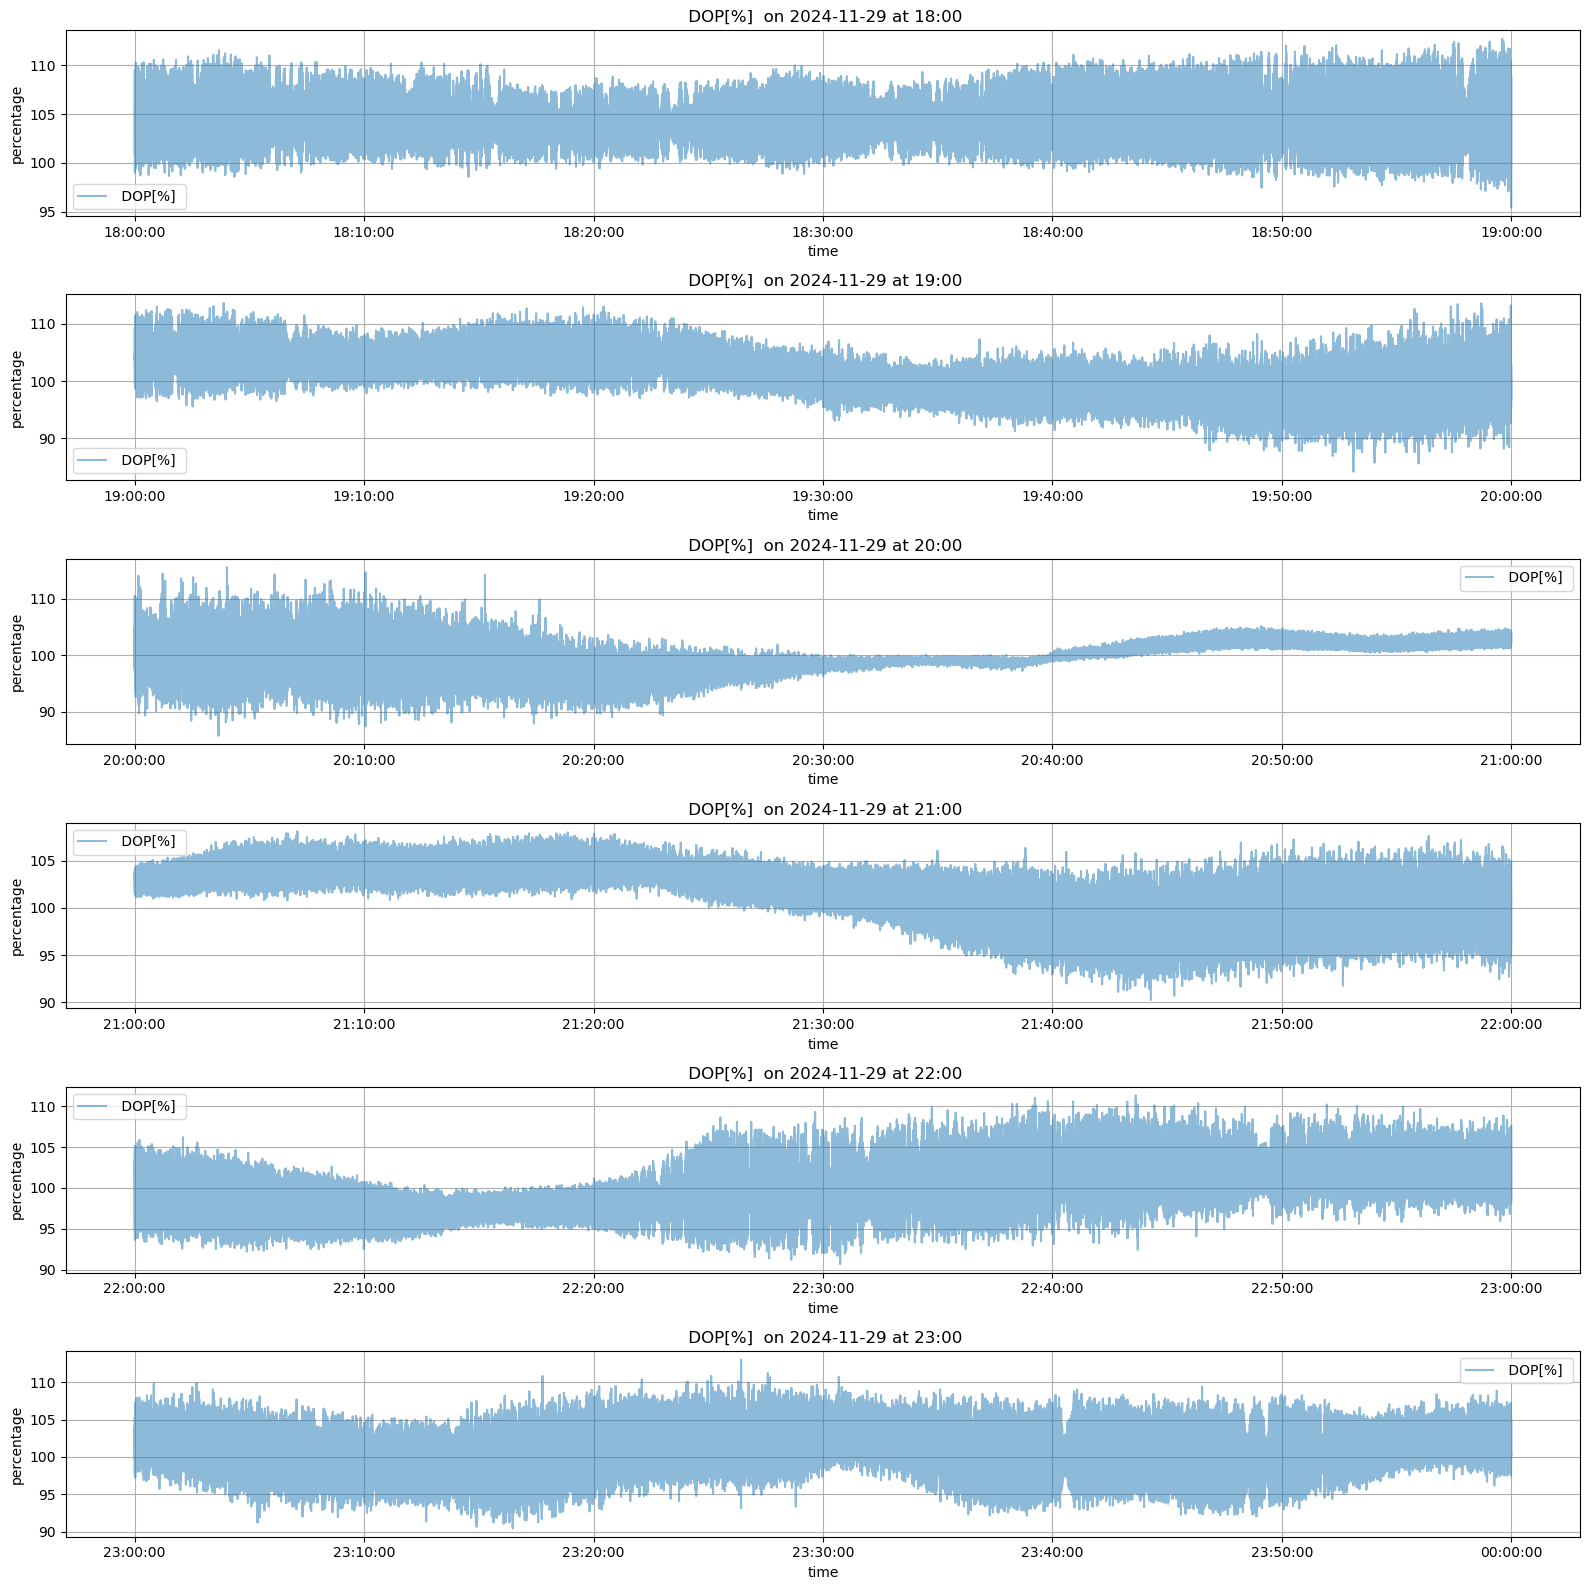

In [18]:
daily_quaters = [degree_hourly[:6], degree_hourly[6:12], degree_hourly[12:18], degree_hourly[18:]]
for quater in daily_quaters:
    fig, axs = plt.subplots(len(quater), 1, figsize=(16, 16), sharex=False)

    for i in range(len(quater)):
        ax = axs[i] if len(quater) > 1 else axs
        df_day = quater[i][1]

        ax.plot(df_day.index, df_day, label=columns[11], color=colors[day], alpha=0.5)
        ax.grid()
        ax.legend(loc='best')
        ax.set_title(f'{columns[11]} on {degree_daily_list[day][0]} at {quater[i][0]}:00')
        ax.set_xlabel('time')
        ax.set_ylabel('percentage')

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

    plt.tight_layout()
    plt.show()

### Entfernen der "Ausreißer"

In [19]:
new_degree = degree[columns[11]]
new_degree = new_degree.drop(new_degree[(new_degree > 140) | (new_degree < 0)].index)
new_degree.describe()

count    7.088521e+06
mean     9.974852e+01
std      3.296249e+00
min      7.314000e+01
25%      9.738000e+01
50%      9.950000e+01
75%      1.021600e+02
max      1.350300e+02
Name:  DOP[%] , dtype: float64

In [20]:
new_degree_daily = new_degree.groupby(new_degree.index.date)
new_degree_daily_list = list(new_degree_daily)

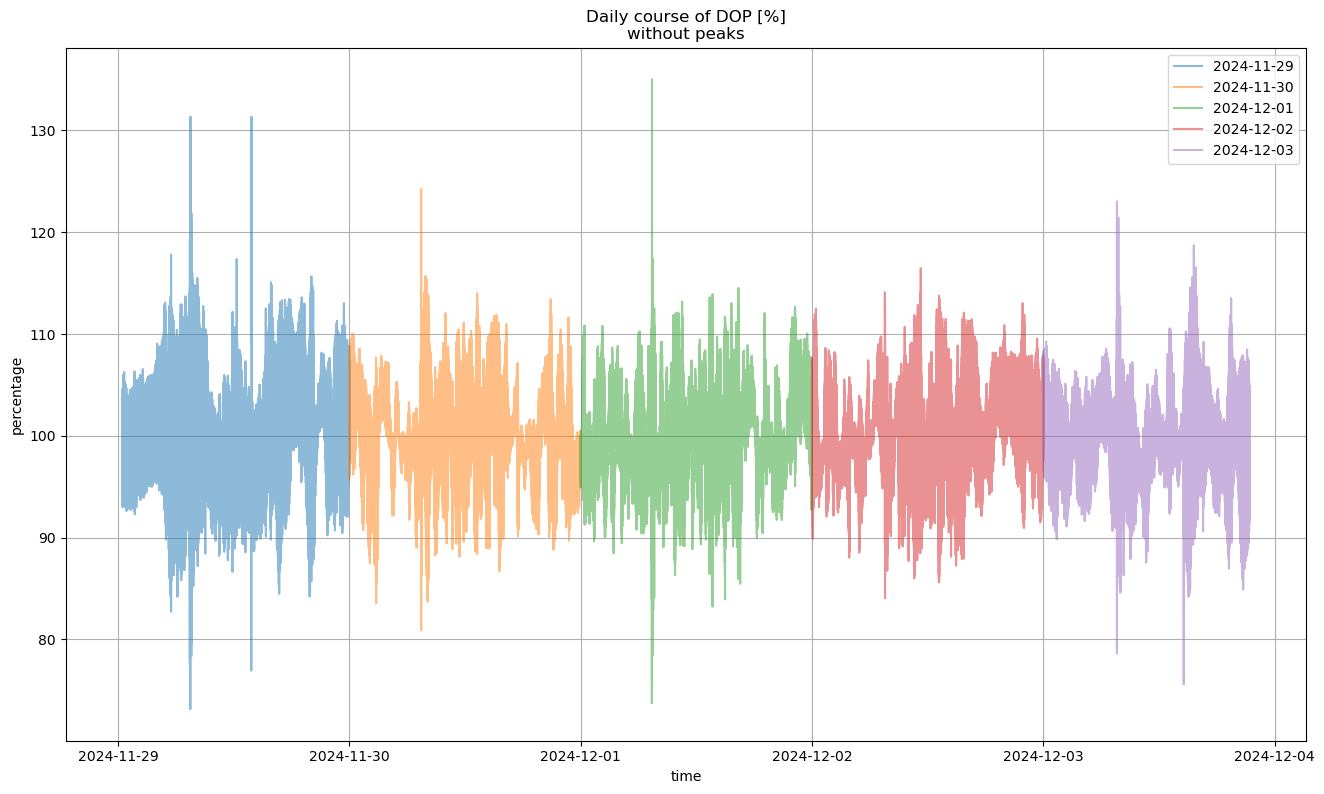

In [21]:
plt.figure(figsize = (16,9))
for date, df_day in new_degree_daily_list:
    values = df_day
    plt.plot(values, label=str(date), alpha = 0.5)
plt.grid()
plt.legend(loc = 'best')
plt.title('Daily course of DOP [%]\nwithout peaks')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

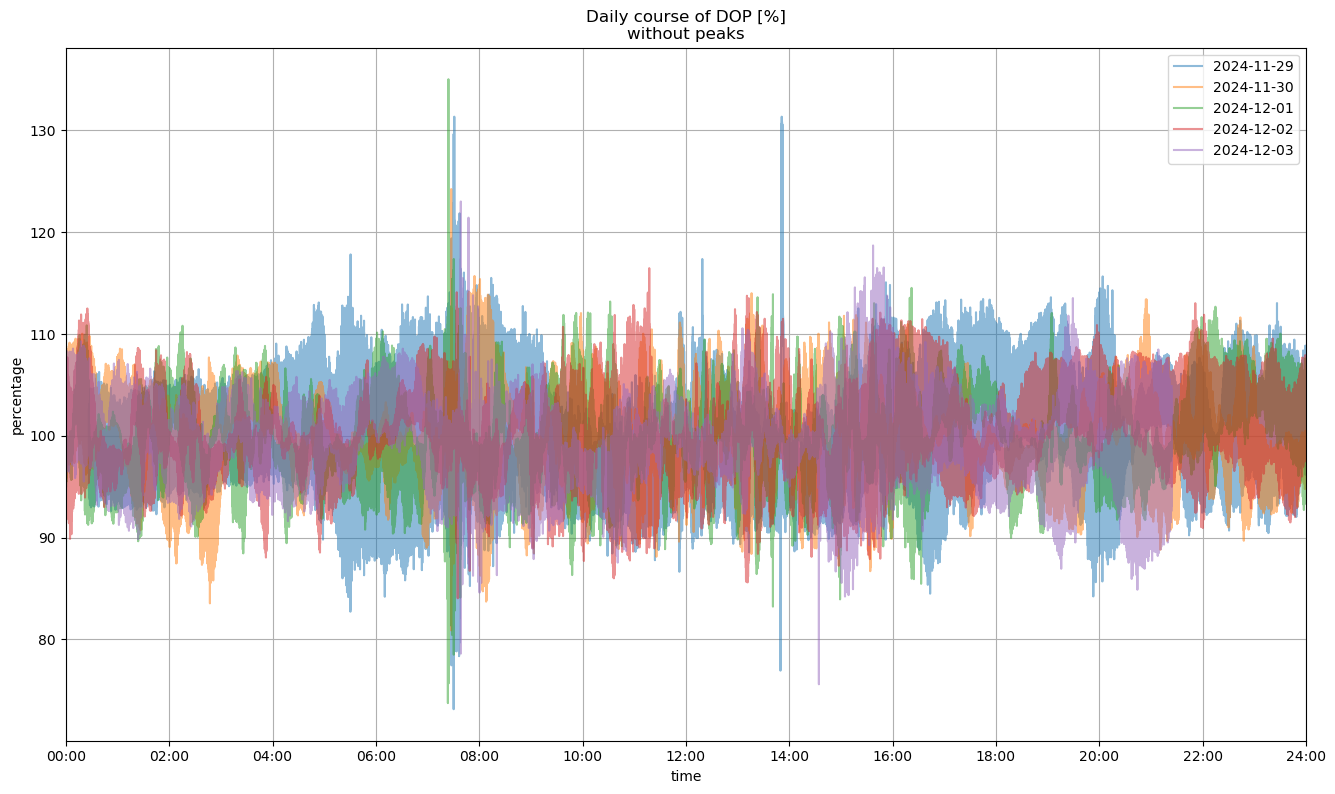

In [22]:
fig, ax = plt.subplots(figsize = (16,9))

for date, df_day in new_degree_daily_list:
    times = (df_day.index - df_day.index.normalize()).total_seconds()
    values = df_day
    plt.plot(times, values, label=str(date) , alpha=0.5)
    

ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
ax.set_xlim(0, 24 * 3600)

plt.grid()
plt.legend(loc = 'best')
plt.title('Daily course of DOP [%]\nwithout peaks')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

### Tägliche Normalverteilung mit Histogramm

In [23]:
'''ydata1 = np.array(new_degree_daily_list[day][1])
mu1 = np.mean(ydata1)
sigma1 = np.std(ydata1)
x1 = np.linspace(ydata1.min(),ydata1.max(),len(ydata1))
y1 = norm.pdf(x1, mu1, sigma1)  

plt.plot(x1, y1, label = 'Normal Distribution', color=colors[day])
plt.hist(ydata1, bins = 50, density = True, color=colors[day], alpha = 0.3, label = "HIST")

plt.title(f'{new_degree_daily_list[day][0]}\n(mu={mu1:.2f}, std={sigma1:.2f})')
plt.legend(loc = 'best')
plt.xlabel(columns[11])
plt.ylabel('density')
plt.grid()
plt.show()'''

'ydata1 = np.array(new_degree_daily_list[day][1])\nmu1 = np.mean(ydata1)\nsigma1 = np.std(ydata1)\nx1 = np.linspace(ydata1.min(),ydata1.max(),len(ydata1))\ny1 = norm.pdf(x1, mu1, sigma1)  \n\nplt.plot(x1, y1, label = \'Normal Distribution\', color=colors[day])\nplt.hist(ydata1, bins = 50, density = True, color=colors[day], alpha = 0.3, label = "HIST")\n\nplt.title(f\'{new_degree_daily_list[day][0]}\n(mu={mu1:.2f}, std={sigma1:.2f})\')\nplt.legend(loc = \'best\')\nplt.xlabel(columns[11])\nplt.ylabel(\'density\')\nplt.grid()\nplt.show()'

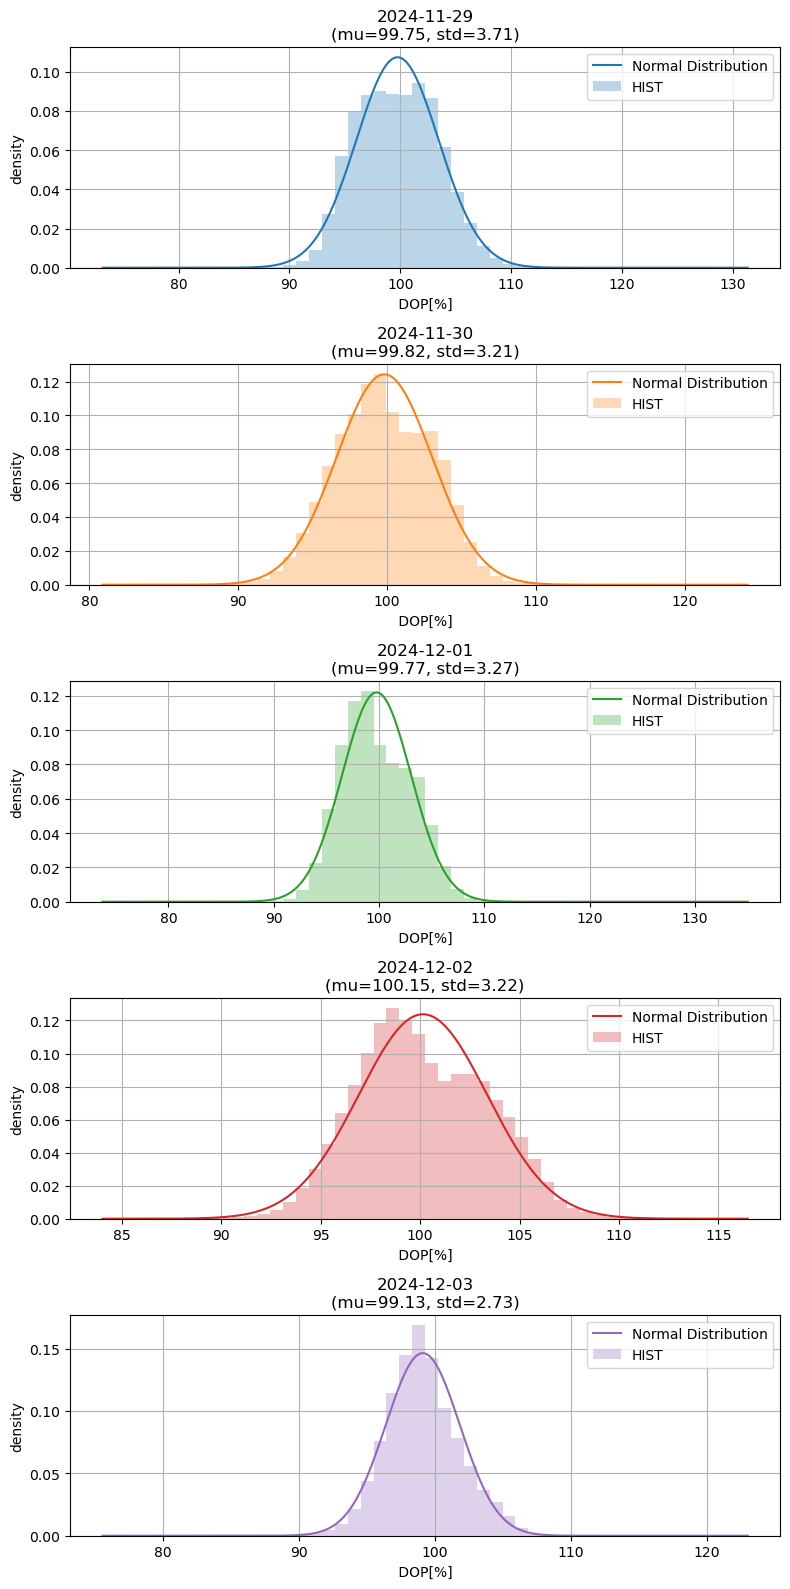

In [24]:
fig, axs = plt.subplots(len(new_degree_daily_list), 1, figsize=(8, 16), sharex=False)

for i in range(len(new_degree_daily_list)):
    ax = axs[i] if len(new_degree_daily_list) > 1 else axs
    ydata1 = np.array(new_degree_daily_list[i][1])
    mu1 = np.mean(ydata1)
    sigma1 = np.std(ydata1)
    x1 = np.linspace(ydata1.min(),ydata1.max(),len(ydata1))
    y1 = norm.pdf(x1, mu1, sigma1)  

    ax.plot(x1, y1, label = 'Normal Distribution', color=colors[i])
    ax.hist(ydata1, bins = 50, density = True, color=colors[i], alpha = 0.3, label = "HIST")
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'{degree_daily_list[i][0]}\n(mu={mu1:.2f}, std={sigma1:.2f})')
    ax.set_xlabel(columns[11])
    ax.set_ylabel('density')

plt.tight_layout()
plt.show()

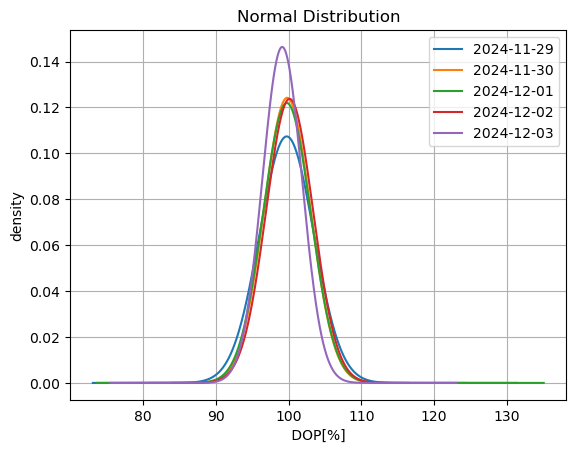

In [25]:
for i in range(len(new_degree_daily_list)):
    ydata1 = np.array(new_degree_daily_list[i][1])
    mu1 = np.mean(ydata1)
    sigma1 = np.std(ydata1)
    x1 = np.linspace(ydata1.min(),ydata1.max(),len(ydata1))
    y1 = norm.pdf(x1, mu1, sigma1)  

    plt.plot(x1, y1, label = new_degree_daily_list[i][0])
    
plt.title(f'Normal Distribution')
plt.legend(loc = 'best')
plt.xlabel(columns[11])
plt.ylabel('density')
plt.grid()
plt.show()

### Anwendung von Tief- und Hochpass-Filtern

In [26]:
def lowpass(data, box = 100):
    box = box
    LP_filter = np.full(int(box), 1/box) 
    lps = np.convolve(ydata, LP_filter)
    lps = lps[ int((box-1) / 2) :len(lps) - int((box - 1) / 2)]
    return lps

def highpass(data, box = 100):
    lps = lowpass(data, box)
    hps = data - lps[:-1]
    return hps

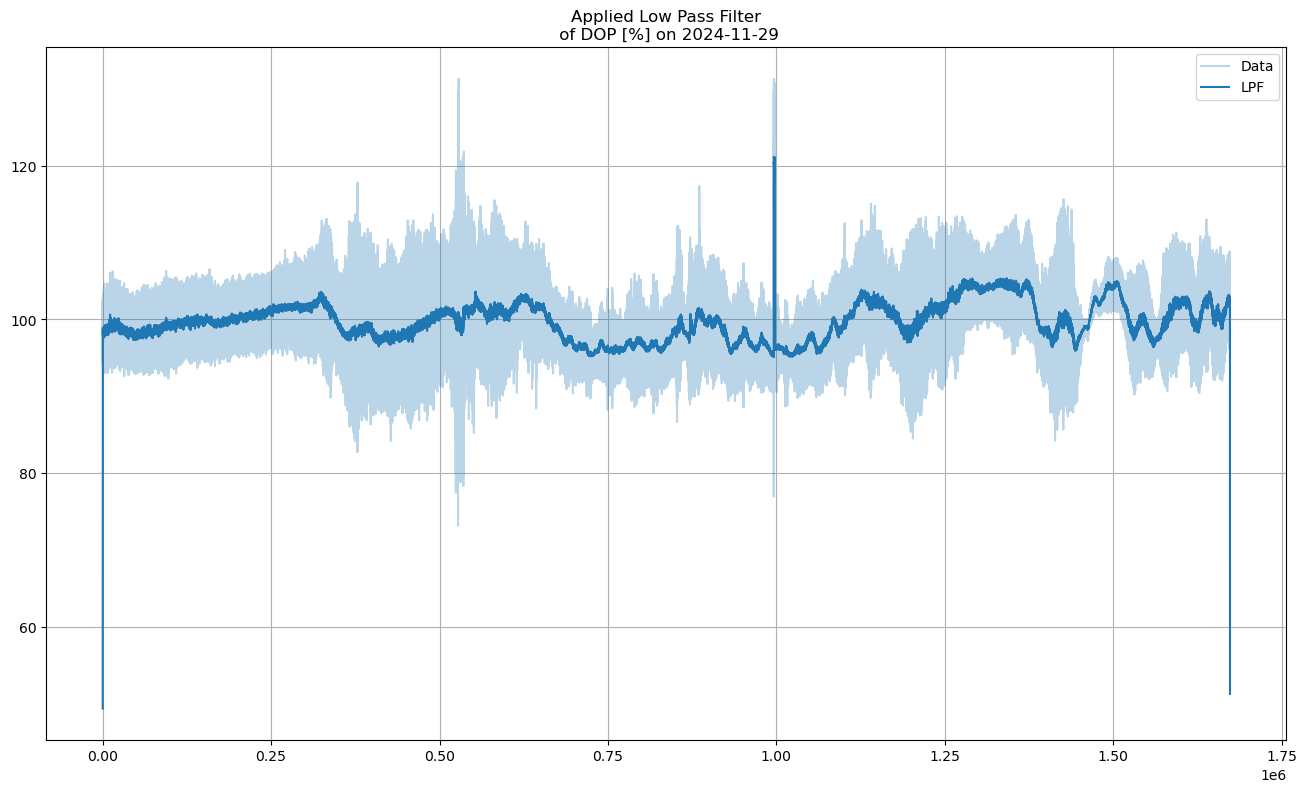

In [27]:
ydata = np.array(new_degree_daily_list[day][1])

lps = lowpass(ydata, 100)
plt.figure(figsize = (16,9))
plt.plot(ydata, label = 'Data', color = colors[day], alpha=0.3)
plt.plot(lps, label = 'LPF', color = colors[day])
plt.title(f'Applied Low Pass Filter\n of DOP [%] on {new_degree_daily_list[day][0]}')
plt.grid()
plt.legend(loc = 'best')
plt.show()

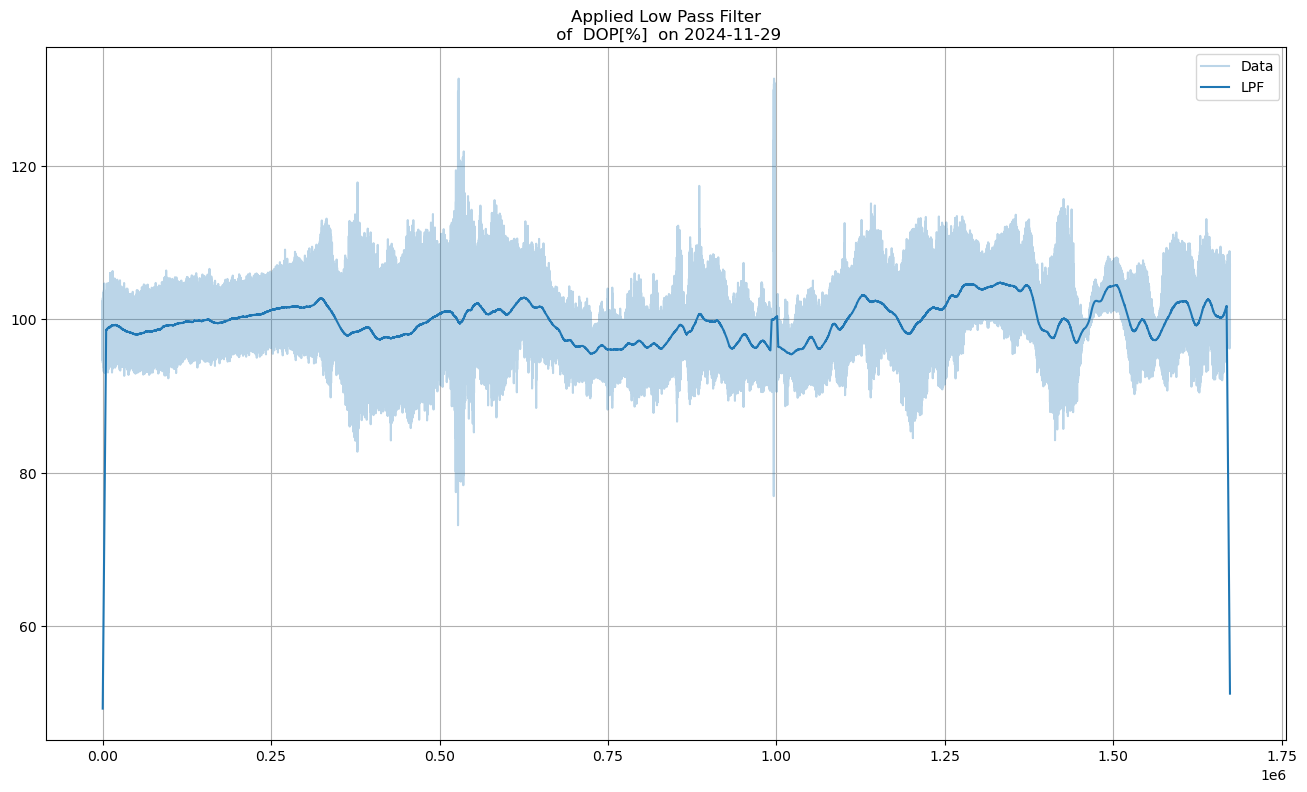

In [28]:
ydata = np.array(new_degree_daily_list[day][1])

lps = lowpass(ydata, 10000)
plt.figure(figsize = (16,9))
plt.plot(ydata, label = 'Data', color = colors[day], alpha=0.3)
plt.plot(lps, label = 'LPF', color = colors[day])
plt.title(f'Applied Low Pass Filter\n of {columns[11]} on {new_degree_daily_list[day][0]}')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [29]:
'''fig, ax = plt.subplots(figsize = (16,9))

for date, df_day in new_degree_daily_list:
    times = (df_day.index - df_day.index.normalize()).total_seconds()
    ydata = np.array(df_day)
    lps = lowpass(ydata, 100)
    plt.plot(times, lps[:-1], label=str(date) , alpha=0.5)
    

ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
ax.set_xlim(0, 24 * 3600)

plt.grid()
plt.legend(loc = 'best')
plt.title('Applied Low Pass Filter\nof {columns[11]}')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()'''

"fig, ax = plt.subplots(figsize = (16,9))\n\nfor date, df_day in new_degree_daily_list:\n    times = (df_day.index - df_day.index.normalize()).total_seconds()\n    ydata = np.array(df_day)\n    lps = lowpass(ydata, 100)\n    plt.plot(times, lps[:-1], label=str(date) , alpha=0.5)\n    \n\nax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))\nax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))\nax.set_xlim(0, 24 * 3600)\n\nplt.grid()\nplt.legend(loc = 'best')\nplt.title('Applied Low Pass Filter\nof {columns[11]}')\nplt.xlabel('time')\nplt.ylabel('percentage')\nplt.show()"

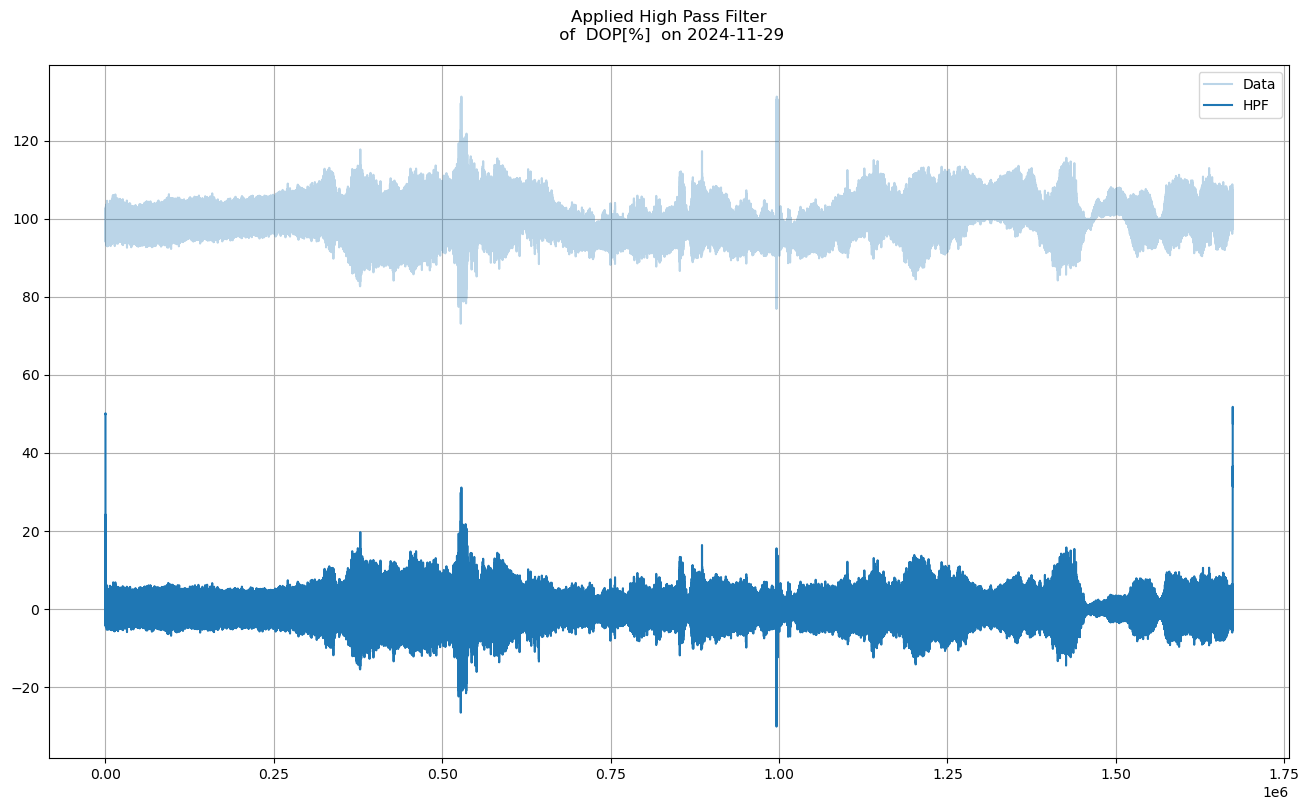

In [30]:
ydata = np.array(new_degree_daily_list[day][1])

hps = highpass(ydata, 100)
plt.figure(figsize = (16,9))
plt.plot(ydata, label = 'Data', color=colors[day], alpha=0.3)
plt.plot(hps, label = 'HPF', color=colors[day])
plt.title(f'Applied High Pass Filter\n of {columns[11]} on {new_degree_daily_list[day][0]}\n')
plt.grid()
plt.legend(loc = 'best')
plt.show()

In [31]:
'''fig, ax = plt.subplots(figsize = (16,9))

for date, df_day in new_degree_daily_list:
    times = (df_day.index - df_day.index.normalize()).total_seconds()
    ydata = np.array(df_day)
    hps = highpass(ydata, 100)
    plt.plot(times, hps, label=str(date) , alpha=0.5)
    

ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
ax.set_xlim(0, 24 * 3600)

plt.grid()
plt.legend(loc = 'best')
plt.title(f'Applied High Pass Filter\nof {columns[11]}')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()'''

"fig, ax = plt.subplots(figsize = (16,9))\n\nfor date, df_day in new_degree_daily_list:\n    times = (df_day.index - df_day.index.normalize()).total_seconds()\n    ydata = np.array(df_day)\n    hps = highpass(ydata, 100)\n    plt.plot(times, hps, label=str(date) , alpha=0.5)\n    \n\nax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))\nax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))\nax.set_xlim(0, 24 * 3600)\n\nplt.grid()\nplt.legend(loc = 'best')\nplt.title(f'Applied High Pass Filter\nof {columns[11]}')\nplt.xlabel('time')\nplt.ylabel('percentage')\nplt.show()"

## Winkel (Azimuth, Ellipticity)

In [32]:
angle = pd.read_csv(filename,skiprows=skip, sep=sep, usecols=[columns[0], columns[9], columns[10]])

In [33]:
angle[columns[0]] = pd.to_datetime(angle[columns[0]])
angle.set_index(columns[0], inplace=True)

### Aufteilung nach Tagen

In [34]:
angle_daily = angle.groupby(angle.index.date)
angle_daily_list = list(angle_daily)

In [35]:
for date, df_day in angle_daily_list:
    print(date, '\n')
    print(df_day.describe())
    print('')

2024-11-29 

        Azimuth[°]    Ellipticity[°] 
count  1.676194e+06      1.676194e+06
mean   5.728160e+00     -1.144504e+00
std    2.365813e+01      1.490541e+01
min   -9.000000e+01     -4.468000e+01
25%   -5.880000e+00     -1.364000e+01
50%    6.930000e+00      1.240000e+00
75%    2.023000e+01      1.106000e+01
max    9.000000e+01      4.454000e+01

2024-11-30 

        Azimuth[°]    Ellipticity[°] 
count  1.500099e+06      1.500099e+06
mean   2.428019e+00      1.063311e+00
std    5.500757e+01      1.903680e+01
min   -9.000000e+01     -4.497000e+01
25%   -4.778000e+01     -1.415000e+01
50%    8.700000e-01      1.020000e+00
75%    5.337000e+01      1.478000e+01
max    9.000000e+01      4.498000e+01

2024-12-01 

        Azimuth[°]    Ellipticity[°] 
count  1.429572e+06      1.429572e+06
mean   7.651423e+00     -2.963670e+00
std    5.176796e+01      1.858525e+01
min   -9.000000e+01     -4.496000e+01
25%   -3.570000e+01     -1.659000e+01
50%    9.750000e+00     -3.400000e+00
75%    5.

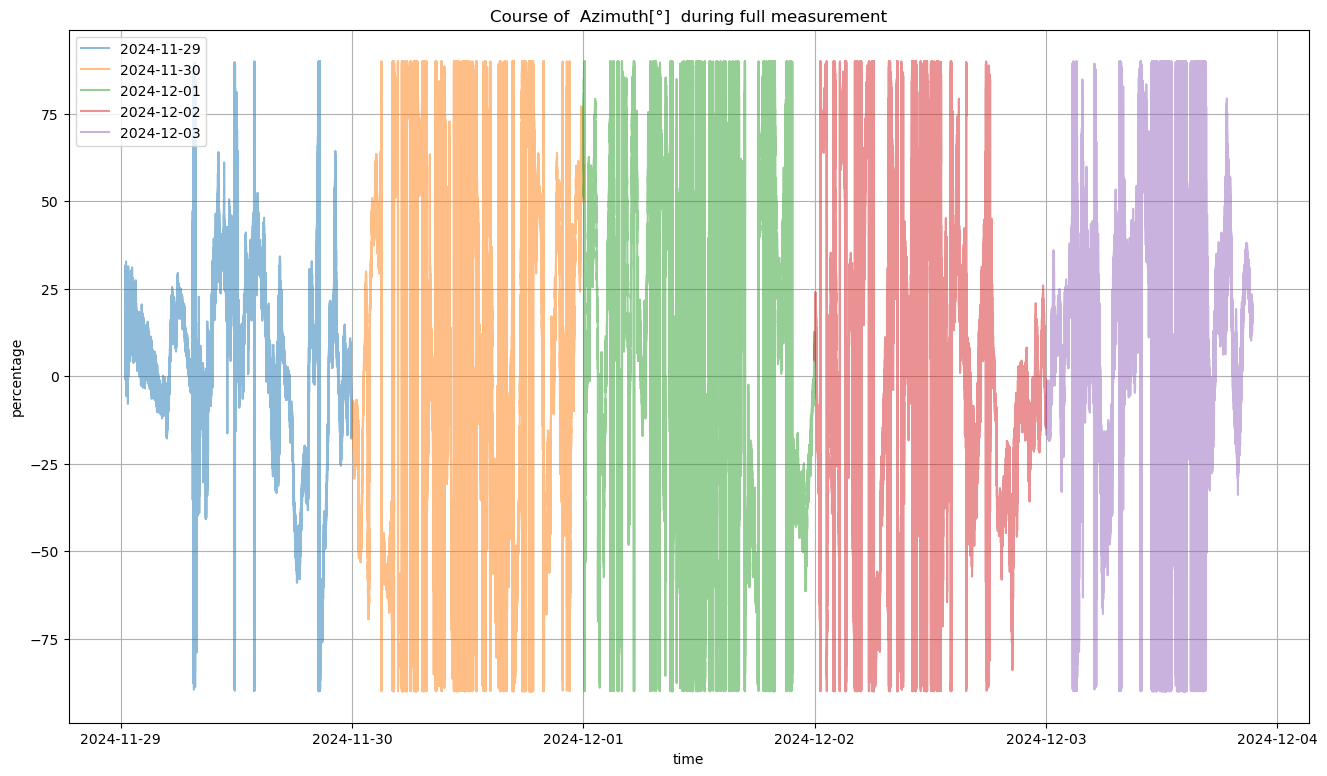

In [36]:
plt.figure(figsize = (16,9))
for date, df_day in angle_daily_list:
    values = df_day[columns[9]]
    plt.plot(values, label=str(date), alpha=0.5)
plt.grid()
plt.legend(loc = 'best')
plt.title(f'Course of {columns[9]} during full measurement')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

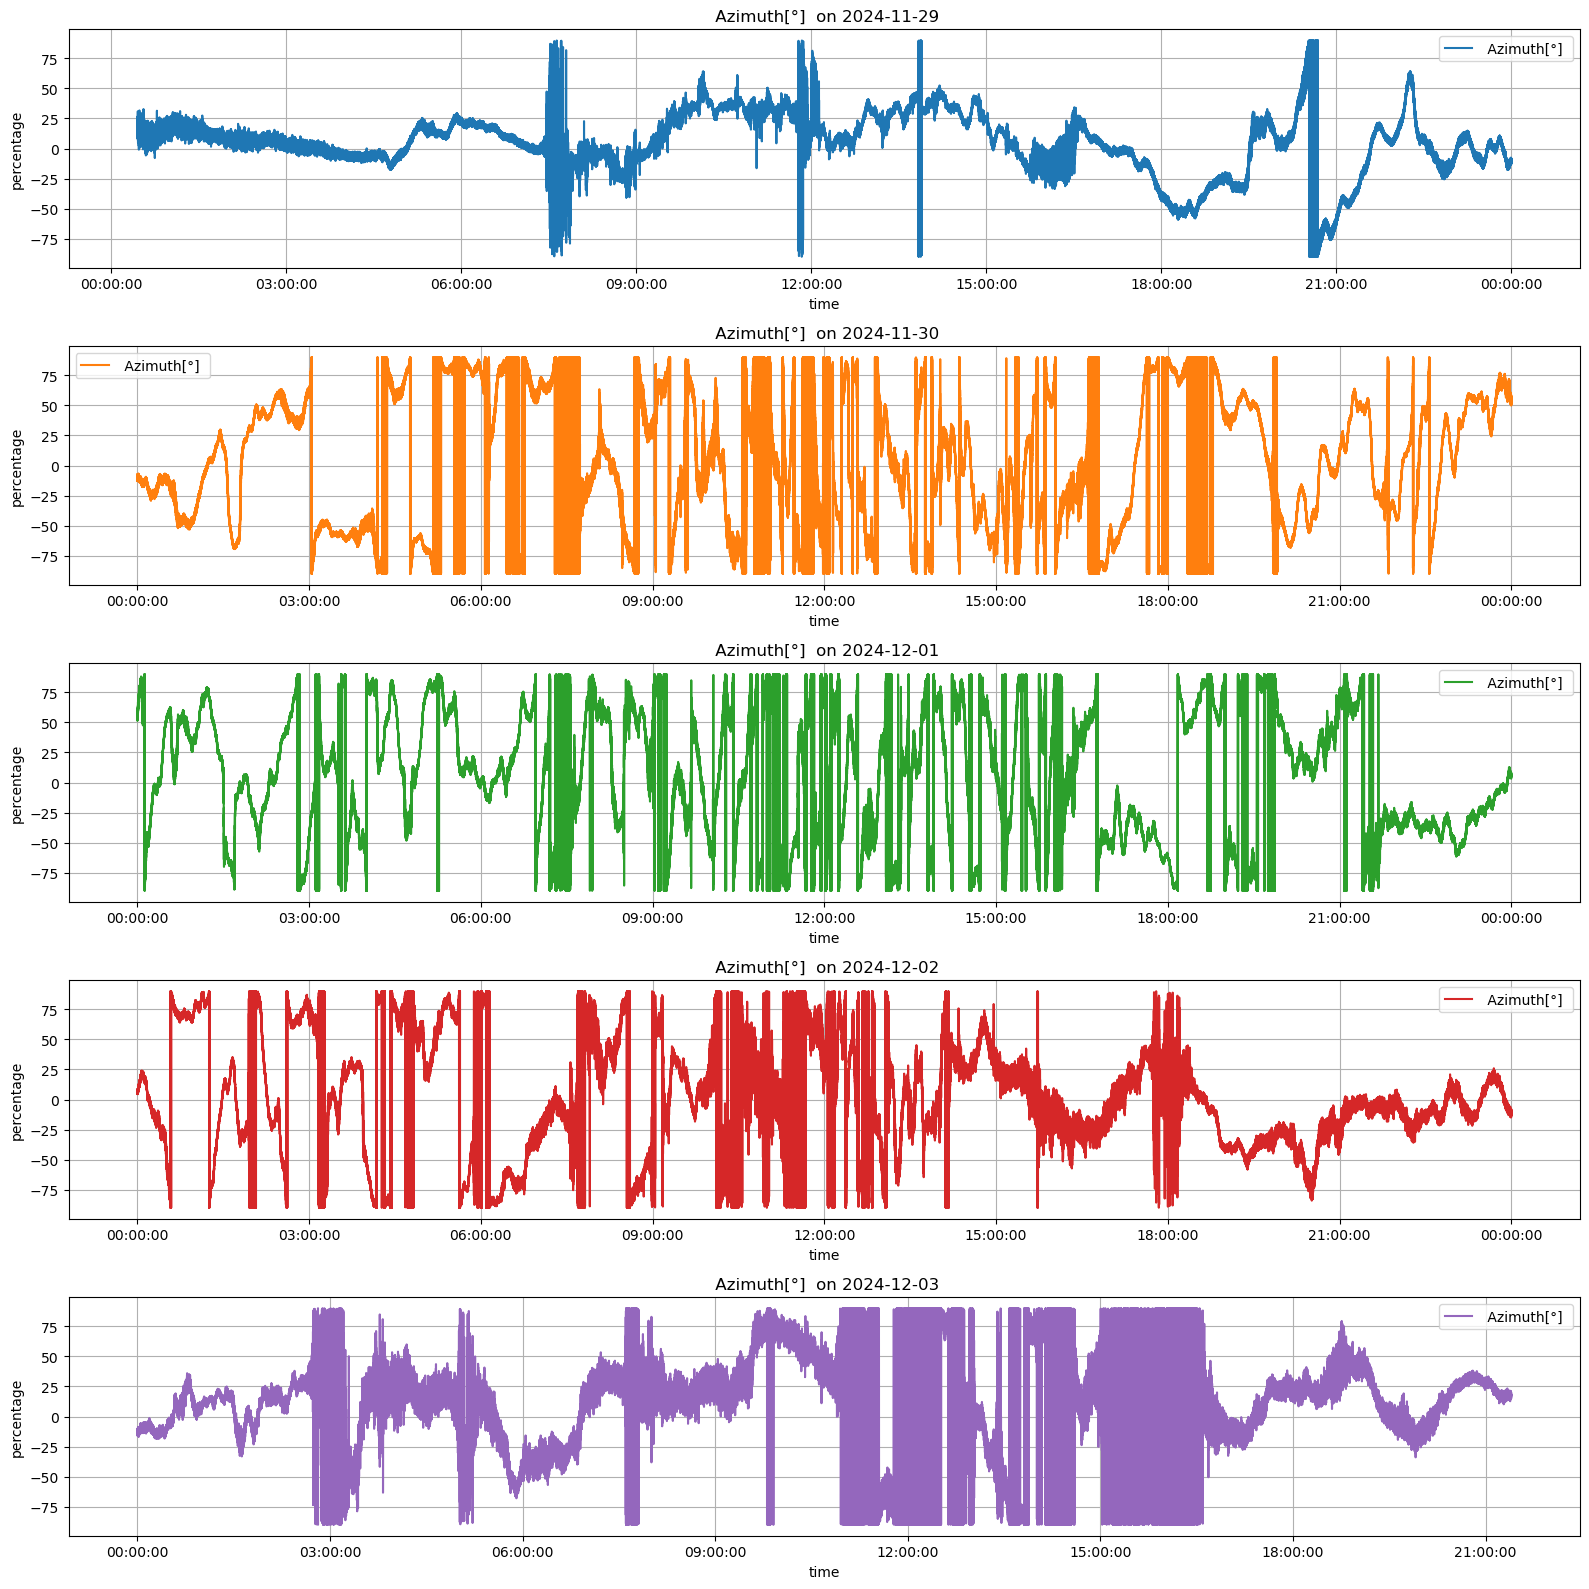

In [36]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(16, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    df_day = angle_daily_list[i][1][columns[9]]

    ax.plot(df_day.index, df_day, label=columns[9], color=colors[i])
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'{columns[9]} on {degree_daily_list[i][0]}')
    ax.set_xlabel('time')
    ax.set_ylabel('percentage')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.tight_layout()
plt.show()

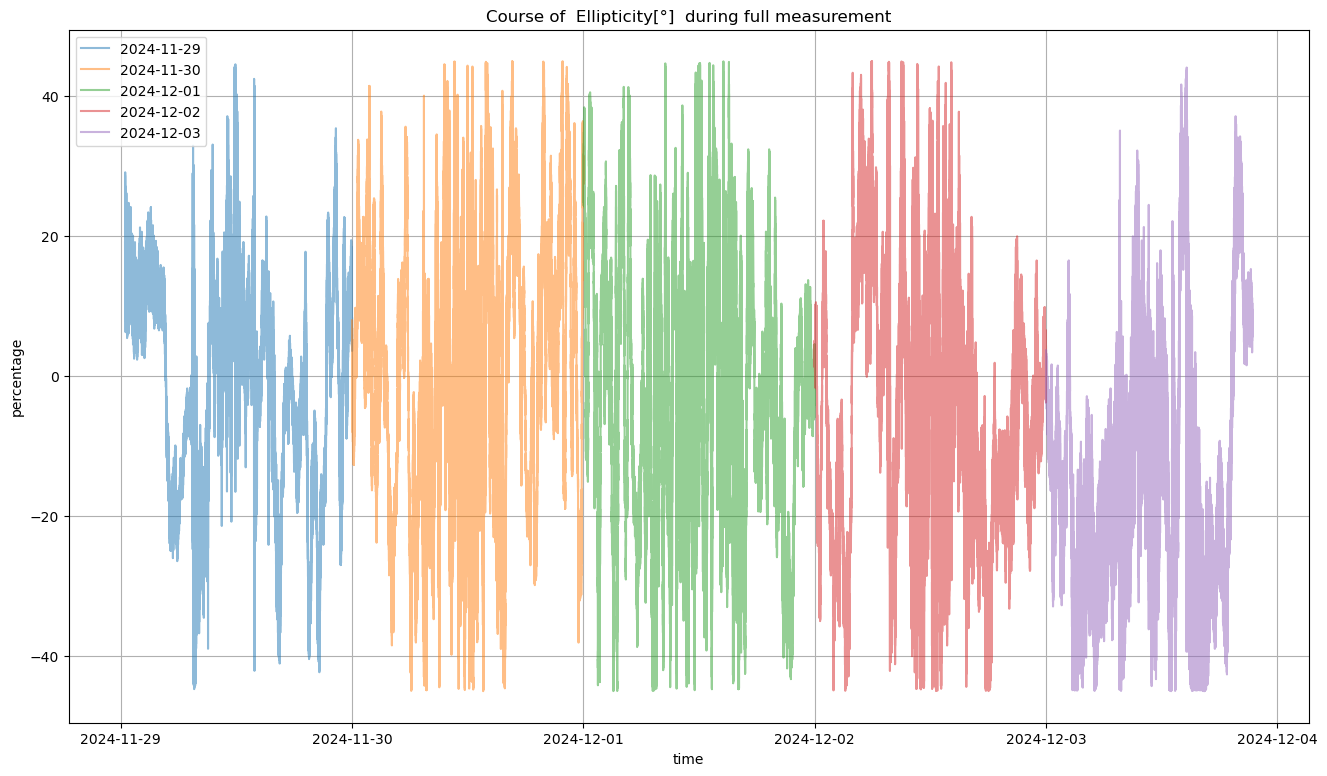

In [37]:
plt.figure(figsize = (16,9))
for date, df_day in angle_daily_list:
    values = df_day[columns[10]]
    plt.plot(values, label=str(date), alpha=0.5)
plt.grid()
plt.legend(loc = 'best')
plt.title(f'Course of {columns[10]} during full measurement')
plt.xlabel('time')
plt.ylabel('percentage')
plt.show()

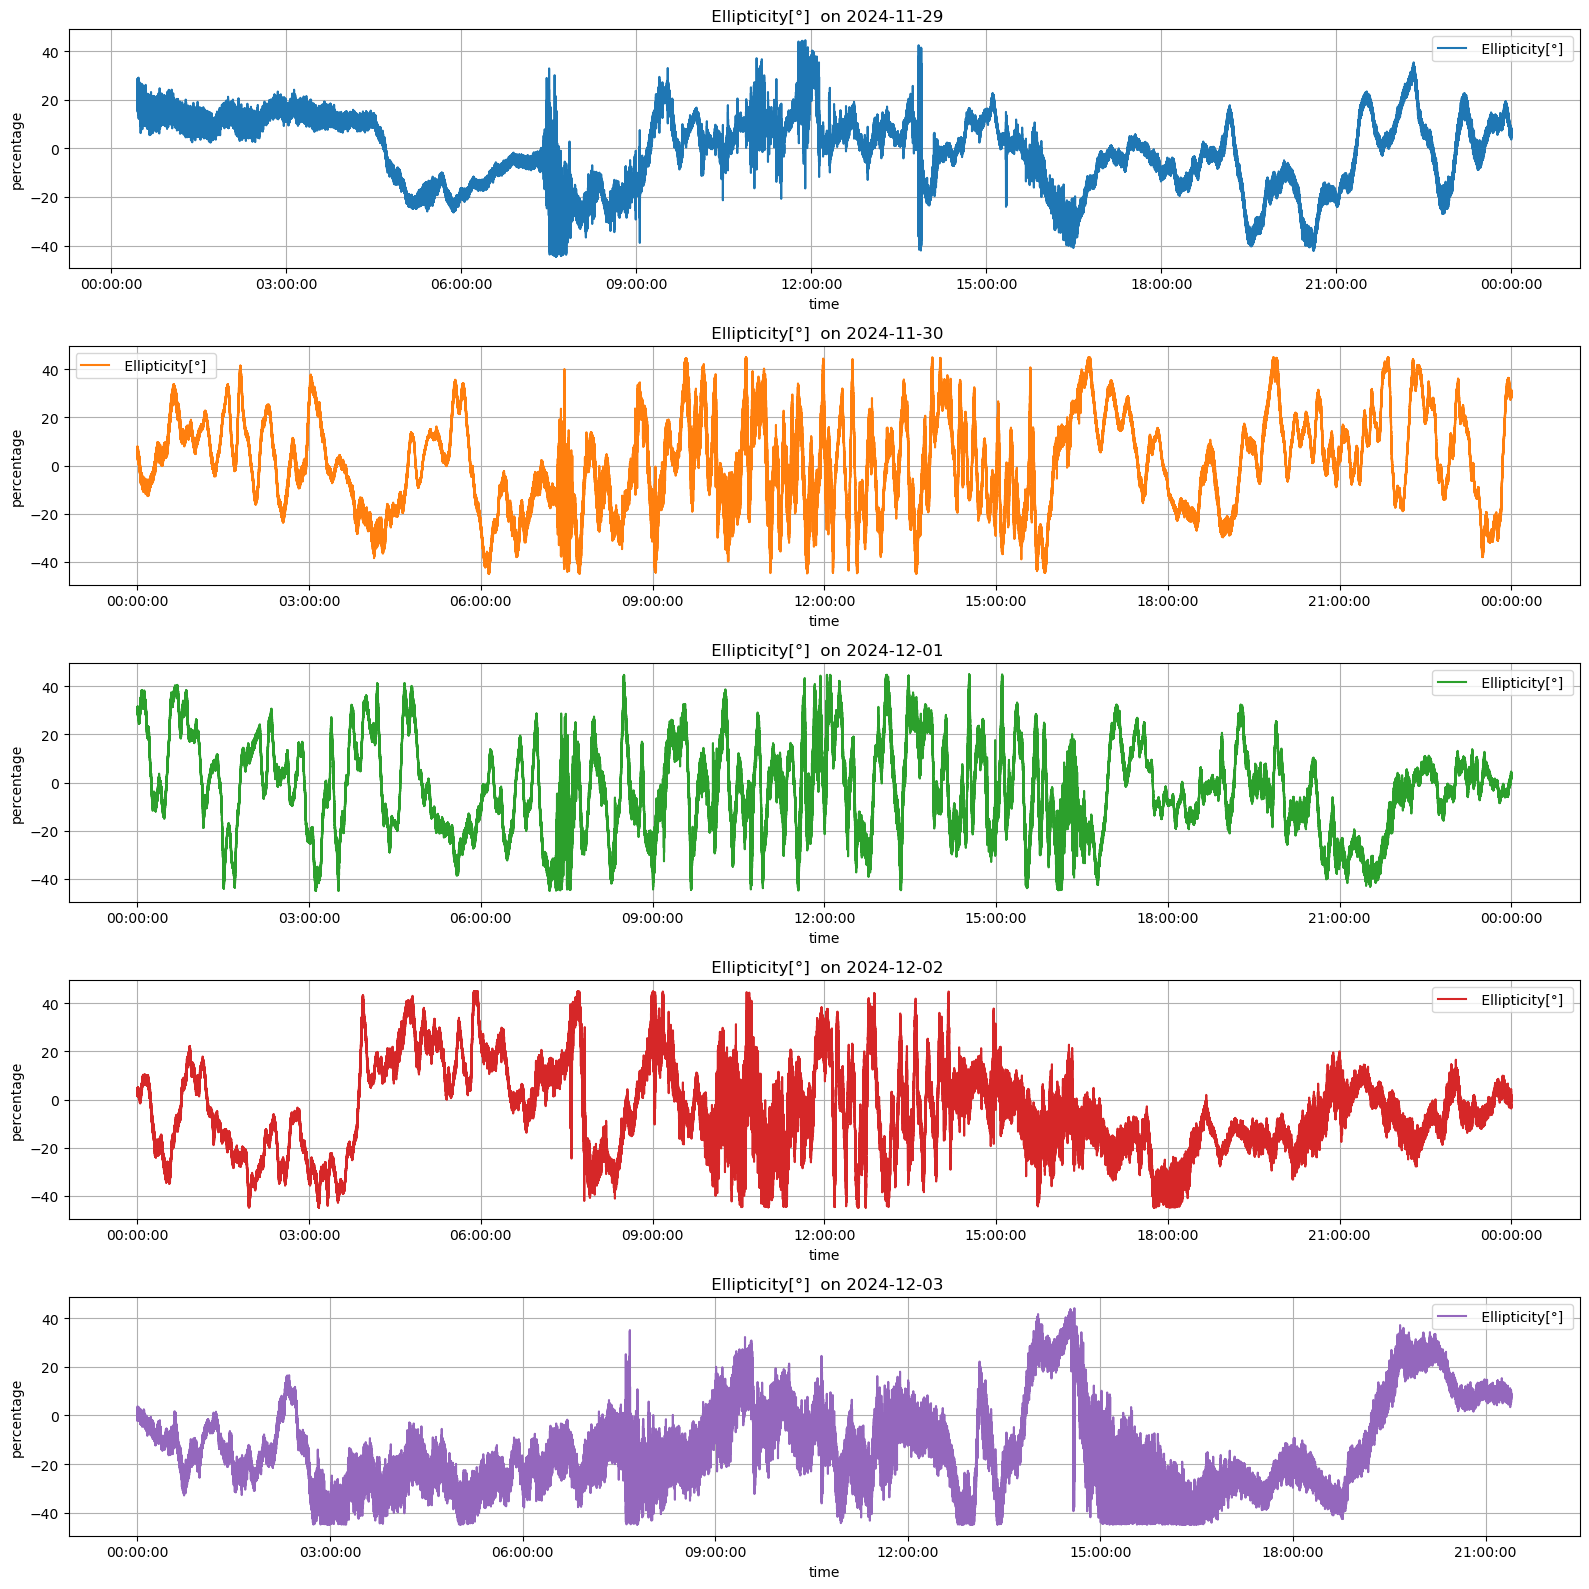

In [38]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(16, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    df_day = angle_daily_list[i][1][columns[10]]

    ax.plot(df_day.index, df_day, label=columns[10], color=colors[i])
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'{columns[10]} on {degree_daily_list[i][0]}')
    ax.set_xlabel('time')
    ax.set_ylabel('percentage')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.tight_layout()
plt.show()

### Tägliche Normalverteilung mit Histogramm

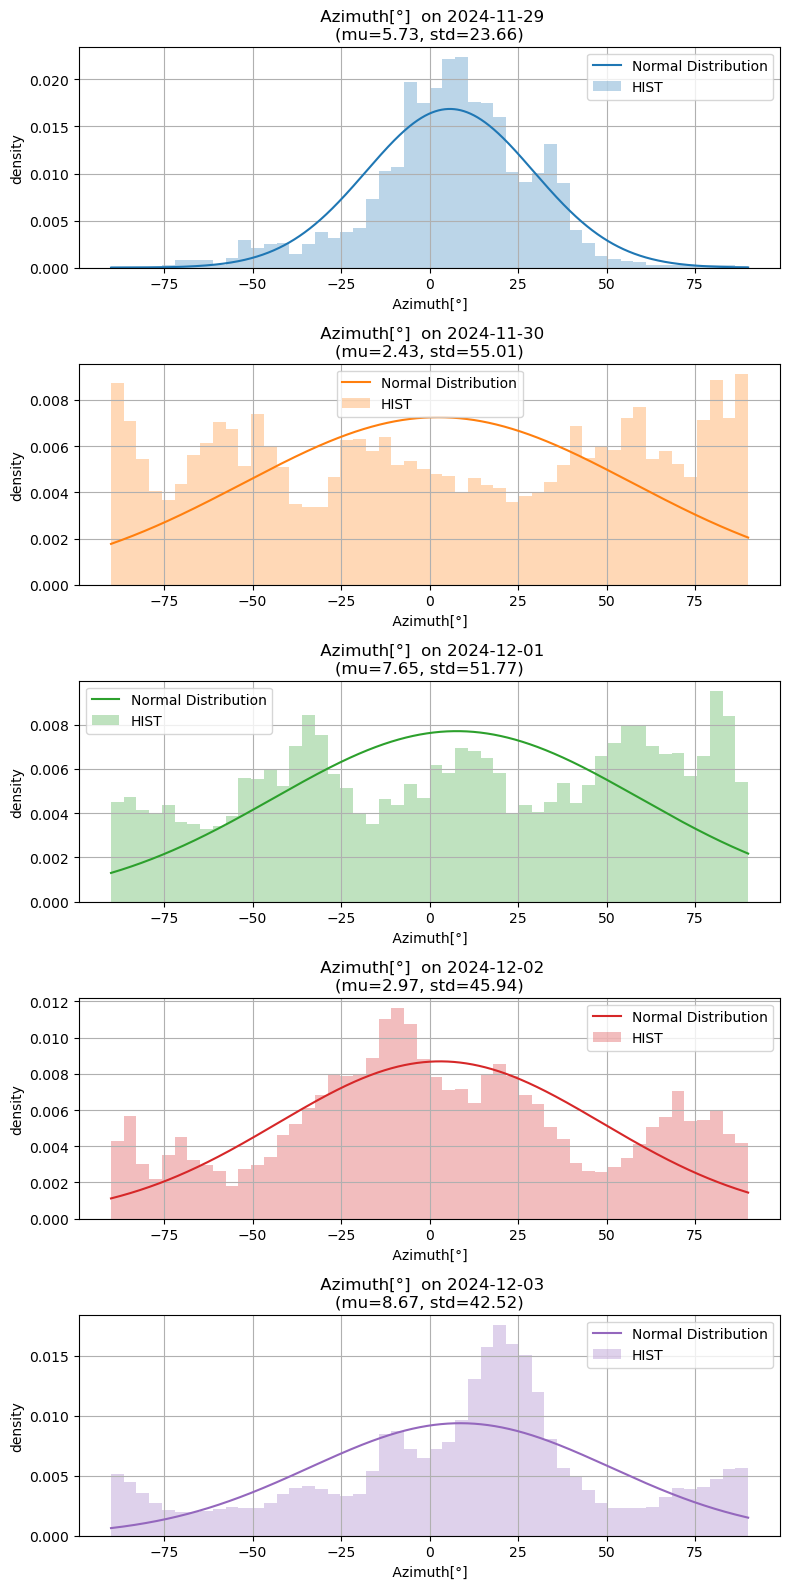

In [39]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(8, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    ydata1 = np.array(angle_daily_list[i][1][columns[9]])
    mu1 = np.mean(ydata1)
    sigma1 = np.std(ydata1)
    x1 = np.linspace(ydata1.min(),ydata1.max(),len(ydata1))
    y1 = norm.pdf(x1, mu1, sigma1)  

    ax.plot(x1, y1, label = 'Normal Distribution', color=colors[i])
    ax.hist(ydata1, bins = 50, density = True, color=colors[i], alpha = 0.3, label = "HIST")
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'{columns[9]} on {angle_daily_list[i][0]}\n(mu={mu1:.2f}, std={sigma1:.2f})')
    ax.set_xlabel(columns[9])
    ax.set_ylabel('density')

plt.tight_layout()
plt.show()

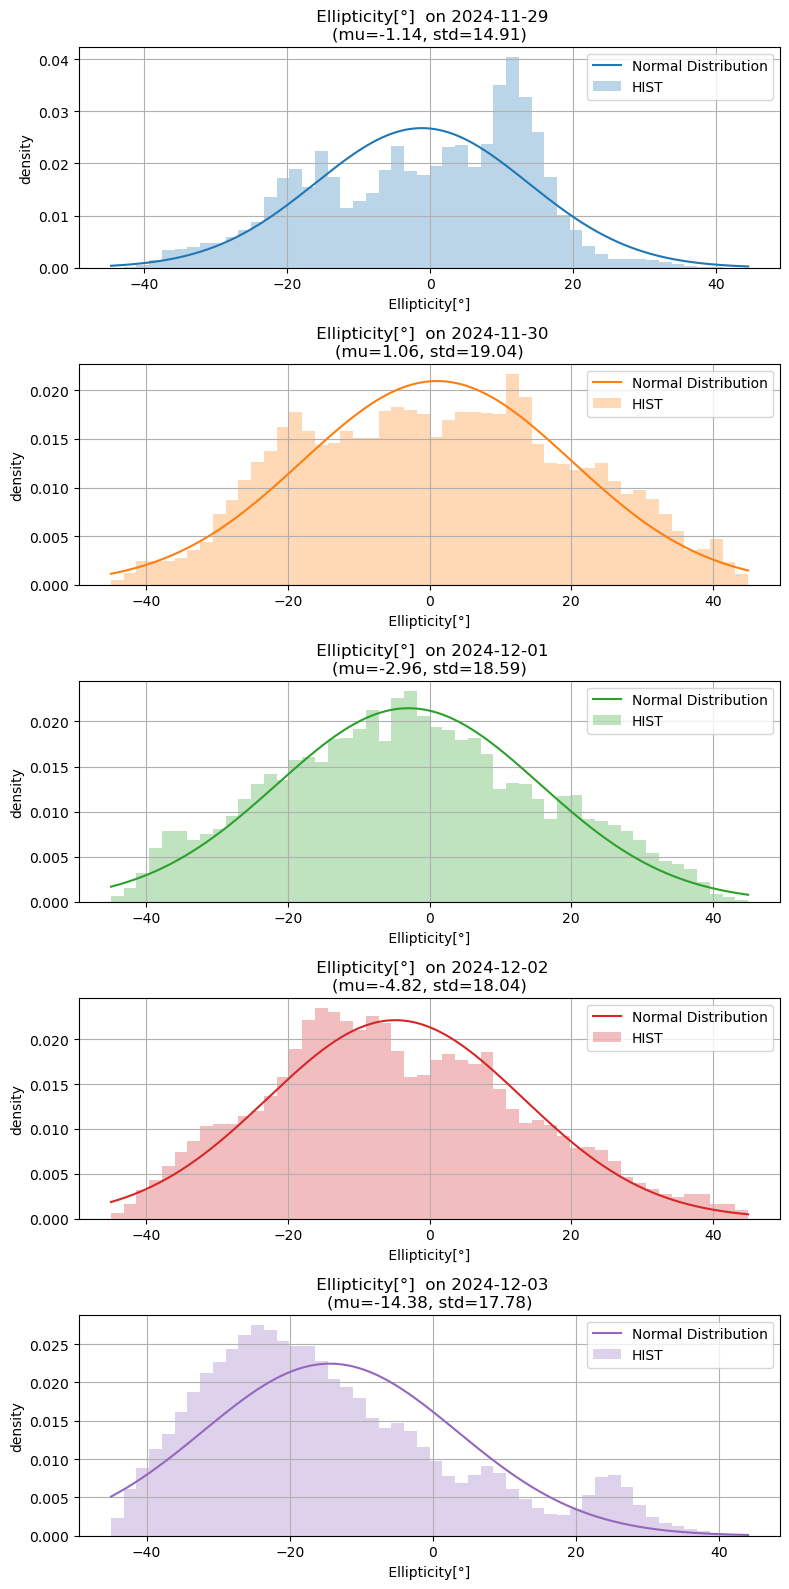

In [40]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(8, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    ydata1 = np.array(angle_daily_list[i][1][columns[10]])
    mu1 = np.mean(ydata1)
    sigma1 = np.std(ydata1)
    x1 = np.linspace(ydata1.min(),ydata1.max(),len(ydata1))
    y1 = norm.pdf(x1, mu1, sigma1)  

    ax.plot(x1, y1, label = 'Normal Distribution', color=colors[i])
    ax.hist(ydata1, bins = 50, density = True, color=colors[i], alpha = 0.3, label = "HIST")
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'{columns[10]} on {angle_daily_list[i][0]}\n(mu={mu1:.2f}, std={sigma1:.2f})')
    ax.set_xlabel(columns[10])
    ax.set_ylabel('density')

plt.tight_layout()
plt.show()

### Anwendung von Tief- und Hochpass-Filtern

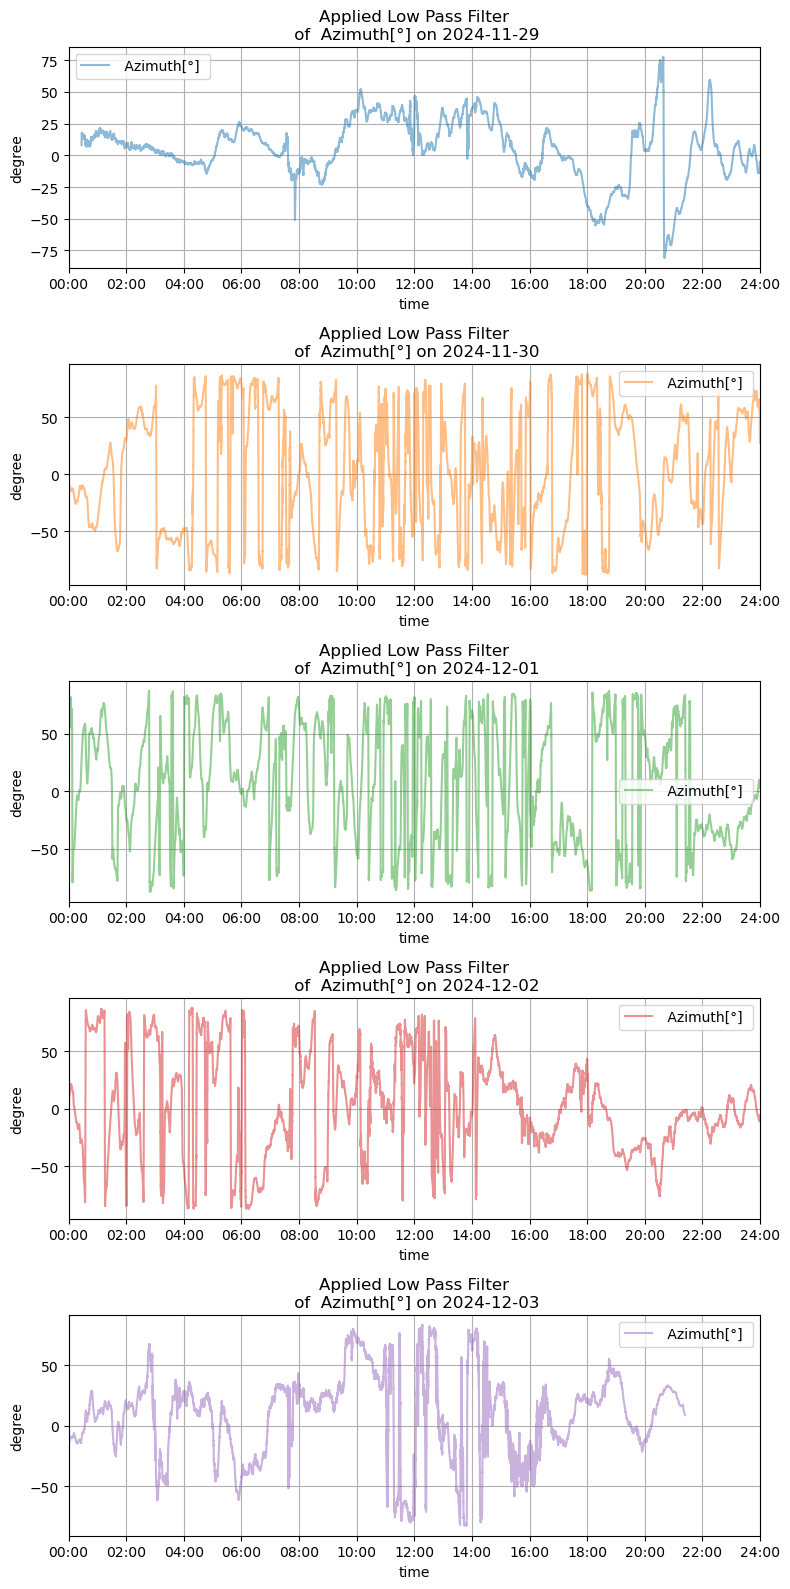

In [41]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(8, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    times = (angle_daily_list[i][1].index - angle_daily_list[i][1].index.normalize()).total_seconds()
    ydata = np.array(angle_daily_list[i][1][columns[9]])
    lps = lowpass(ydata, 1000)

    ax.plot(times, lps[:-1], label=columns[9] ,color=colors[i], alpha=0.5)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
    ax.set_xlim(0, 24 * 3600)
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'Applied Low Pass Filter\n of {columns[9]}on {angle_daily_list[i][0]}')
    ax.set_xlabel('time')
    ax.set_ylabel('degree')

plt.tight_layout()
plt.show()

In [42]:
'''fig, ax = plt.subplots(figsize = (16,9))

for date, df_day in angle_daily_list:
    times = (df_day.index - df_day.index.normalize()).total_seconds()
    ydata = np.array(df_day[columns[9]])
    lps = lowpass(ydata, 100)
    plt.plot(times, lps[:-1], label=str(date) , alpha=0.5)
    

ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
ax.set_xlim(0, 24 * 3600)

plt.grid()
plt.legend(loc = 'best')
plt.title(f'Applied Low Pass Filter\nof {columns[9]}')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()'''

"fig, ax = plt.subplots(figsize = (16,9))\n\nfor date, df_day in angle_daily_list:\n    times = (df_day.index - df_day.index.normalize()).total_seconds()\n    ydata = np.array(df_day[columns[9]])\n    lps = lowpass(ydata, 100)\n    plt.plot(times, lps[:-1], label=str(date) , alpha=0.5)\n    \n\nax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))\nax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))\nax.set_xlim(0, 24 * 3600)\n\nplt.grid()\nplt.legend(loc = 'best')\nplt.title(f'Applied Low Pass Filter\nof {columns[9]}')\nplt.xlabel('time')\nplt.ylabel('degree')\nplt.show()"

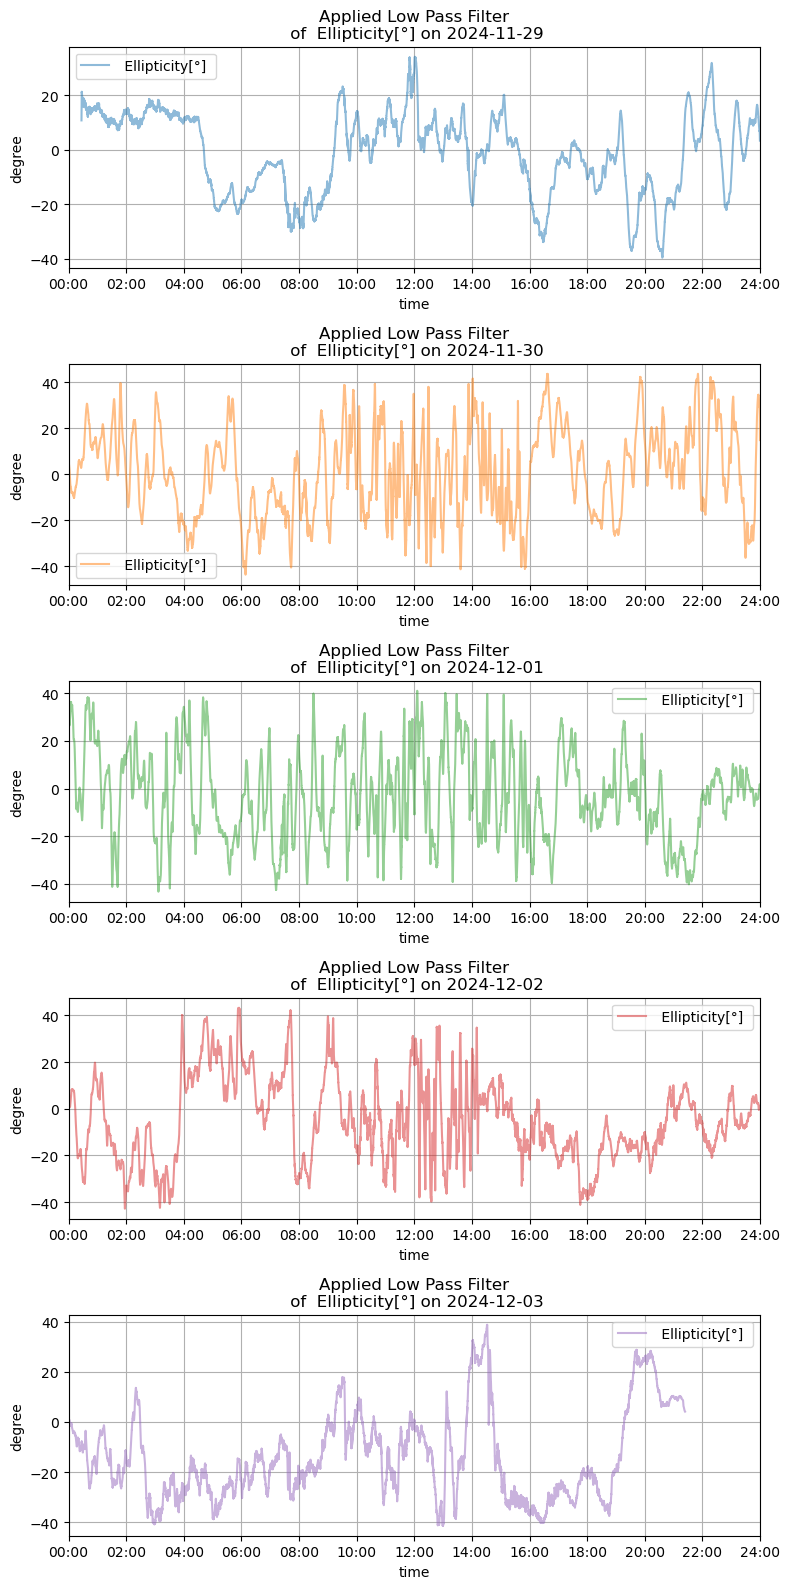

In [43]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(8, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    times = (angle_daily_list[i][1].index - angle_daily_list[i][1].index.normalize()).total_seconds()
    ydata = np.array(angle_daily_list[i][1][columns[10]])
    lps = lowpass(ydata, 1000)

    ax.plot(times, lps[:-1], label=columns[10] ,color=colors[i], alpha=0.5)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
    ax.set_xlim(0, 24 * 3600)
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'Applied Low Pass Filter\n of {columns[10]}on {angle_daily_list[i][0]}')
    ax.set_xlabel('time')
    ax.set_ylabel('degree')

plt.tight_layout()
plt.show()

In [44]:
'''fig, ax = plt.subplots(figsize = (16,9))

for date, df_day in angle_daily_list:
    times = (df_day.index - df_day.index.normalize()).total_seconds()
    ydata = np.array(df_day[columns[10]])
    lps = lowpass(ydata, 100)
    plt.plot(times, lps[:-1], label=str(date) , alpha=0.5)
    

ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
ax.set_xlim(0, 24 * 3600)

plt.grid()
plt.legend(loc = 'best')
plt.title(f'Applied Low Pass Filter\nof {columns[10]}')
plt.xlabel('time')
plt.ylabel('degree')
plt.show()'''

"fig, ax = plt.subplots(figsize = (16,9))\n\nfor date, df_day in angle_daily_list:\n    times = (df_day.index - df_day.index.normalize()).total_seconds()\n    ydata = np.array(df_day[columns[10]])\n    lps = lowpass(ydata, 100)\n    plt.plot(times, lps[:-1], label=str(date) , alpha=0.5)\n    \n\nax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))\nax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))\nax.set_xlim(0, 24 * 3600)\n\nplt.grid()\nplt.legend(loc = 'best')\nplt.title(f'Applied Low Pass Filter\nof {columns[10]}')\nplt.xlabel('time')\nplt.ylabel('degree')\nplt.show()"

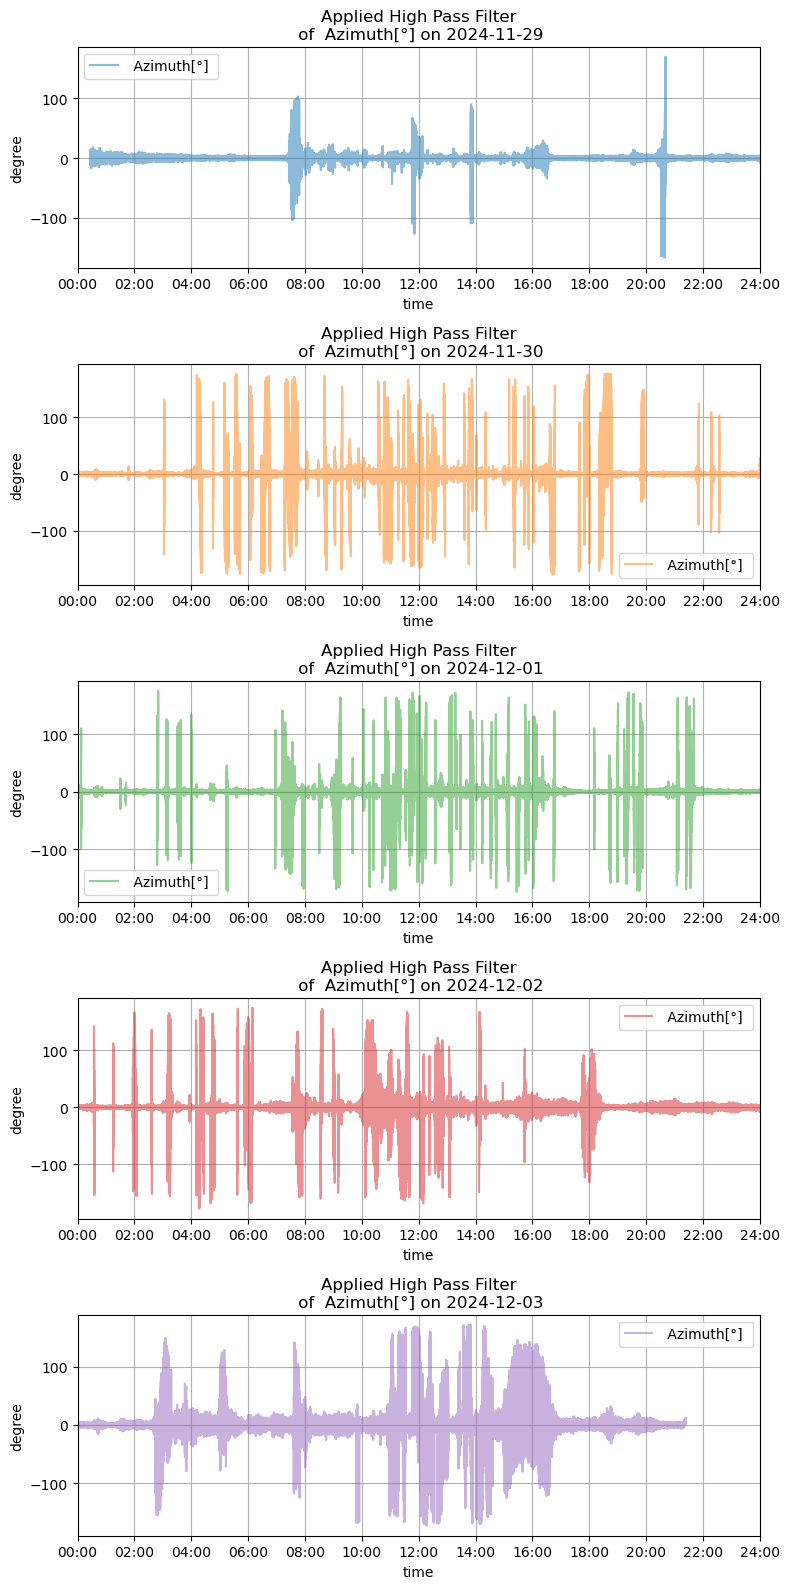

In [45]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(8, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    times = (angle_daily_list[i][1].index - angle_daily_list[i][1].index.normalize()).total_seconds()
    ydata = np.array(angle_daily_list[i][1][columns[9]])
    hps = highpass(ydata, 1000)

    ax.plot(times, hps, label=columns[9] ,color=colors[i], alpha=0.5)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
    ax.set_xlim(0, 24 * 3600)
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'Applied High Pass Filter\n of {columns[9]}on {angle_daily_list[i][0]}')
    ax.set_xlabel('time')
    ax.set_ylabel('degree')

plt.tight_layout()
plt.show()

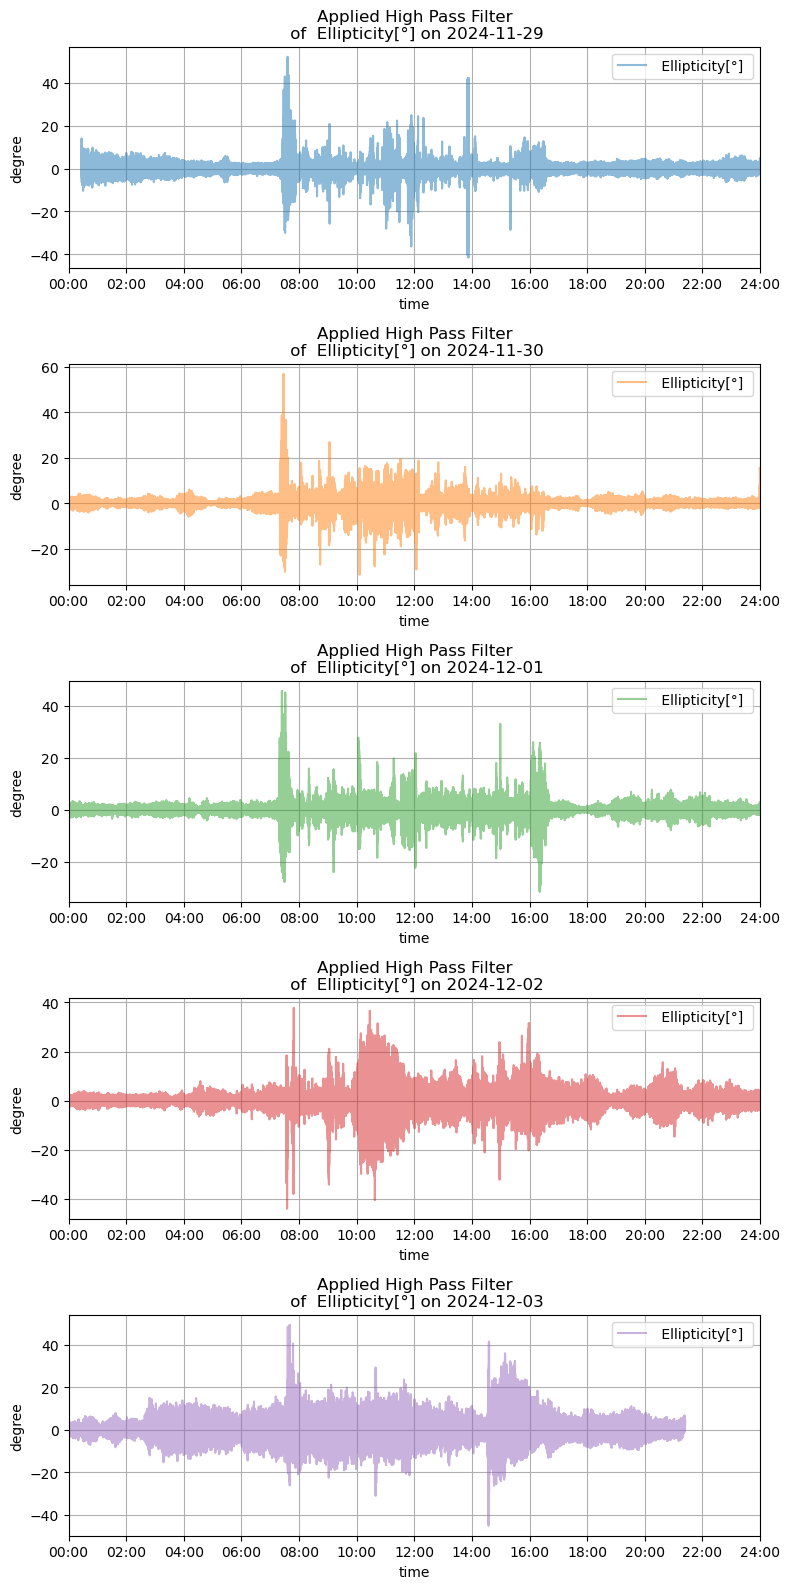

In [46]:
fig, axs = plt.subplots(len(angle_daily_list), 1, figsize=(8, 16), sharex=False)

for i in range(len(angle_daily_list)):
    ax = axs[i] if len(angle_daily_list) > 1 else axs
    times = (angle_daily_list[i][1].index - angle_daily_list[i][1].index.normalize()).total_seconds()
    ydata = np.array(angle_daily_list[i][1][columns[10]])
    hps = highpass(ydata, 1000)

    ax.plot(times, hps, label=columns[10] ,color=colors[i], alpha=0.5)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(3600 * 2))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_time))
    ax.set_xlim(0, 24 * 3600)
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_title(f'Applied High Pass Filter\n of {columns[10]}on {angle_daily_list[i][0]}')
    ax.set_xlabel('time')
    ax.set_ylabel('degree')

plt.tight_layout()
plt.show()

### Poincaré-Kugel

Zur Analyse und Darstellung der gemessenen Winkel im Zusammenhang mit der Poincare-Kugel, wurde das Python-Tool <a href="https://py-pol.readthedocs.io/en/master/index.html">"py_pol"</a> verwendet.

In [47]:
from py_pol.jones_vector import Jones_vector, degrees
from py_pol.stokes import Stokes

In [48]:
one_second = datetime.timedelta(seconds=1)
one_minute = datetime.timedelta(minutes=1)
one_hour = datetime.timedelta(hours=1)
one_quater = datetime.timedelta(hours=6)
one_day = datetime.timedelta(days=1)

start_time = datetime.datetime.strptime(str(degree.index[0]), '%Y-%m-%d %H:%M:%S.%f')
end_time_second = start_time + one_second
end_time_minute = start_time + one_minute
end_time_hour = start_time + one_hour
end_time_quater = start_time + one_quater
end_time_day = start_time + one_day

In [49]:
first_val = angle.iloc[0]

az = np.array(first_val[columns[9]]) * degrees
el = np.array(first_val[columns[10]]) * degrees

S = Stokes("Calculated Point")
S.general_azimuth_ellipticity(az, el)

fig = S.draw_poincare(kind="scatter")
#fig.show()

In [50]:
first_second = angle.loc[(angle.index >= start_time) & (angle.index < end_time_second)]

az = np.array(first_second[columns[9]].values) * degrees  
el = np.array(first_second[columns[10]].values) * degrees

S = Stokes("Calculated Points")
S.general_azimuth_ellipticity(az, el)

fig = S.draw_poincare(kind="scatter")
#fig.show()

In [51]:
first_minute = angle.loc[(angle.index >= start_time) & (angle.index < end_time_minute)]

az = np.array(first_minute[columns[9]].values) * degrees
el = np.array(first_minute[columns[10]].values) * degrees

S = Stokes("Calculated Points")
S.general_azimuth_ellipticity(az, el)

fig = S.draw_poincare(kind="scatter")
#fig.show()

In [52]:
first_hour = angle.loc[(angle.index >= start_time) & (angle.index < end_time_hour)]

az = np.array(first_hour[columns[9]].values) * degrees
el = np.array(first_hour[columns[10]].values) * degrees

S = Stokes("Calculated Points")
S.general_azimuth_ellipticity(az, el)

fig = S.draw_poincare(kind="scatter")
#fig.show()

In [53]:
first_quater = angle.loc[(angle.index >= start_time) & (angle.index < end_time_quater)]

az = np.array(first_quater[columns[9]].values) * degrees
el = np.array(first_quater[columns[10]].values) * degrees

S = Stokes("Calculated Points")
S.general_azimuth_ellipticity(az, el)

fig = S.draw_poincare(kind="scatter")
#fig.show()

In [54]:
first_day = angle.loc[(angle.index >= start_time) & (angle.index < end_time_day)]

az = np.array(first_day[columns[9]].values) * degrees
el = np.array(first_day[columns[10]].values) * degrees

S = Stokes("Calculated Points")
S.general_azimuth_ellipticity(az, el)

fig = S.draw_poincare(kind="scatter")
#fig.show()